Описание данных
Вам представлены данные о доходах сотрудников участка горячего проката за год, в том числе данные, описывающие специфику рабочих мест.
Задание
Часть строк по доходу не заполнена, заполните их
Выявите формулу дохода в целом и его составных частей
Проверьте, что данная формула объясняет доход с точностью до копейки
Выявите зависимости между составными частями дохода

Пришлите нам:
Итоговую формулу дохода в теле письма или в Word
Базу со всеми доходами в Excel
Подсказка:
Доход состоит из оклада, премии и двух видов доплат и индивидуальных надбавок


# Установим некоторые модули

In [301]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [302]:
import pandas as pd
from pandas import *
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport
from scipy import stats as st
from matplotlib.cbook import boxplot_stats
import plotly.graph_objects as go
from math import ceil
import math
from sklearn.impute import KNNImputer

In [303]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Загружаем данные из Excel-таблицы

In [304]:
df = read_excel('/content/drive/MyDrive/data/Данные.xlsx')


#Проверка на корректность считанных данных

In [305]:
df.head()

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,180,1950,NaN
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,228,1950,NaN
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,252,1950,NaN
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01-01,240,1950,NaN
4,5,Волков Д. М.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01-01,252,1950,NaN


In [306]:
df.tail(30)

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
2370,2371,Семенов Д. А.,Вальцовщик,7,Пилигримовые станы,3.3,2022-12-01,168,1500,27207.67
2371,2372,Сергеев Д. Б.,Вальцовщик,7,Пилигримовые станы,3.3,2022-12-01,180,1500,NaN
2372,2373,Степанов Т. Т.,Вальцовщик,7,Пилигримовые станы,3.3,2022-12-01,192,1500,NaN
2373,2374,Титов Т. П.,Вальцовщик,7,Пилигримовые станы,3.3,2022-12-01,180,1500,30770.48
2374,2375,Богданов А. Т.,Вальцовщик,7,Прошивной стан,3.3,2022-12-01,168,1500,27207.67
2375,2376,Гаврилов Д. Е.,Вальцовщик,7,Прошивной стан,3.3,2022-12-01,156,1500,25264.26
2376,2377,Курочкин В. М.,Вальцовщик,7,Прошивной стан,3.3,2022-12-01,180,1500,30770.48
2377,2378,Наумов Д. Г.,Вальцовщик,7,Прошивной стан,3.3,2022-12-01,204,1500,37896.10
2378,2379,Попов Е. Ю.,Вальцовщик,7,Прошивной стан,3.3,2022-12-01,180,1500,30770.48
2379,2380,Сергеев Р. Е.,Вальцовщик,7,Прошивной стан,3.3,2022-12-01,192,1500,NaN


#Первичный анализ данных

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  2400 non-null   int64         
 1   FIO                 2400 non-null   object        
 2   Профессия           2400 non-null   object        
 3   Разряд              2400 non-null   int64         
 4   Оборудование        2400 non-null   object        
 5   Класс вредности     2400 non-null   float64       
 6   Месяц               2400 non-null   datetime64[ns]
 7   Отработанные часы   2400 non-null   int64         
 8   Объем производства  2400 non-null   int64         
 9   Доход (руб.)        1551 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 187.6+ KB


Посмотрим на пропущенные данные

In [308]:
df.isnull().sum()

ID                      0
FIO                     0
Профессия               0
Разряд                  0
Оборудование            0
Класс вредности         0
Месяц                   0
Отработанные часы       0
Объем производства      0
Доход (руб.)          849
dtype: int64

Уменьшим размер таблицы, приведем признаки int64 в int8 и int16

In [309]:
df['Разряд']=df['Разряд'].astype('int16')
df['Отработанные часы']=df['Отработанные часы'].astype('int16')
df['Объем производства']=df['Объем производства'].astype('int16')

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  2400 non-null   int64         
 1   FIO                 2400 non-null   object        
 2   Профессия           2400 non-null   object        
 3   Разряд              2400 non-null   int16         
 4   Оборудование        2400 non-null   object        
 5   Класс вредности     2400 non-null   float64       
 6   Месяц               2400 non-null   datetime64[ns]
 7   Отработанные часы   2400 non-null   int16         
 8   Объем производства  2400 non-null   int16         
 9   Доход (руб.)        1551 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int16(3), int64(1), object(3)
memory usage: 145.4+ KB


Изменим представление столбца Месяц

In [312]:
df["Месяц"] = pd.to_datetime(df["Месяц"])
df["Месяц"] = df["Месяц"].apply(lambda x:x.strftime('%Y-%m'))
df.head()

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,180,1950,NaN
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,228,1950,NaN
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,252,1950,NaN
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01,240,1950,NaN
4,5,Волков Д. М.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01,252,1950,NaN


Посмотрим на корелляцию значений по признакам только по полным данным

In [313]:
df_d=df[df['Доход (руб.)']>0]

In [314]:
df_d.corr()

<ipython-input-314-5867a58da307>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,ID,Разряд,Класс вредности,Отработанные часы,Объем производства,Доход (руб.)
ID,1.000000,6.349095e-02,1.344706e-02,-0.359120,-4.072840e-01,-0.277501
Разряд,0.063491,1.000000e+00,1.275417e-02,-0.002390,1.499356e-16,0.270216
Класс вредности,0.013447,1.275417e-02,1.000000e+00,-0.002187,5.590757e-16,0.142454
Отработанные часы,-0.359120,-2.389957e-03,-2.187141e-03,1.000000,8.987250e-01,0.923457
Объем производства,-0.407284,1.499356e-16,5.590757e-16,0.898725,1.000000e+00,0.841699
Доход (руб.),-0.277501,2.702160e-01,1.424537e-01,0.923457,8.416990e-01,1.000000


Посторим тепловую диагармму для наглядности

In [315]:
fig = px.imshow(df_d.corr())
fig.show()

<ipython-input-315-9da04e99ef81>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Вывод: наблюдается сильная корреляция между признаками Доход - Объем производства, Доход - Отработанные часы и Отработанные часы - Объем производства. Исходя из практики мы понимаем что при увеличении отработанных часов увеличивается и объем произведенных товаров.

#Первичный анализ с помощью Pandas Profiling

In [316]:
#profile = ProfileReport(df_d)
#profile.to_notebook_iframe()

**Детальный анализ признаков**

In [317]:
df_d.keys()

Index(['ID', 'FIO', 'Профессия', 'Разряд', 'Оборудование', 'Класс вредности',
       'Месяц', 'Отработанные часы', 'Объем производства', 'Доход (руб.)'],
      dtype='object')

#Рассмотрим признак Отработанные часы

In [318]:
i=sorted(df["Отработанные часы"].unique()) #посмотрим какие данные присутствуют в признаке Отработанные часы
i

[72,
 84,
 96,
 108,
 120,
 132,
 144,
 156,
 168,
 180,
 192,
 204,
 216,
 228,
 240,
 252,
 264,
 276,
 288,
 300,
 312,
 324,
 336,
 348]

In [319]:
len(sorted(df["Отработанные часы"].unique())) #сколько уникальных данных присутствуют в признаке Отработанные часы


24

In [320]:
j=sorted(df["Объем производства"].unique()) #посмотрим какие данные присутствуют в признаке Объем производства
j

[890, 1200, 1430, 1460, 1490, 1500, 1620, 1640, 1790, 1930, 1950, 2250]

In [321]:
len(sorted(df["Объем производства"].unique())) #сколько уникальных данных присутствуют в признаке Объем производства

12

In [322]:
k=df.groupby(['Профессия', 'Разряд'])[['Доход (руб.)', 'Отработанные часы']].min().reset_index()
k

,Профессия,Разряд,Доход (руб.),Отработанные часы
0,Вальцовщик,5,13106.76,96
1,Вальцовщик,6,14263.39,96
2,Вальцовщик,7,15547.24,96
3,Вальцовщик,8,NaN,96
4,Контролер качества готовой продукции,7,12955.24,96
5,Контролер качества готовой продукции,8,NaN,108
6,Нагревальщик металла,4,12640.76,96
7,Нагревальщик металла,5,11972.42,84
8,Нагревальщик металла,6,16694.31,108
9,Нагревальщик металла,7,18138.64,96


Посмотри на разницу доходом при 72, 84 и 96 часах у уборщиков и 84 и 95 часов у Нагревальщик металла	и Оператор поста управления

In [323]:
df_72=df[(df.Профессия == 'Уборщик') &  (df['Отработанные часы']==72)].min()
df_84=df[(df.Профессия == 'Уборщик') &  (df['Отработанные часы']==84)].min()
df_96=df[(df.Профессия == 'Уборщик') &  (df['Отработанные часы']==96)].min()
df_72, df_84, df_96

(ID                                  1809
 FIO                        Краснов И. М.
 Профессия                        Уборщик
 Разряд                                 2
 Оборудование          Пилигримовые станы
 Класс вредности                      3.3
 Месяц                            2022-10
 Отработанные часы                     72
 Объем производства                   890
 Доход (руб.)                         NaN
 dtype: object,
 ID                                         1803
 FIO                               Абрамов Е. Д.
 Профессия                               Уборщик
 Разряд                                        2
 Оборудование          Вспомогательные помещения
 Класс вредности                             1.0
 Месяц                                   2022-10
 Отработанные часы                            84
 Объем производства                          890
 Доход (руб.)                                NaN
 dtype: object,
 ID                                         1812
 FIO     

In [324]:
df_Kras=df[df['FIO'] =='Краснов И. М.']
df_Kras

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
8,9,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-01,288,1950,NaN
208,209,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-02,192,1460,NaN
408,409,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-03,180,1430,NaN
608,609,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-04,216,1790,NaN
808,809,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-05,228,1490,NaN
1008,1009,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-06,264,2250,NaN
1208,1209,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-07,228,1620,NaN
1408,1409,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-08,276,1930,NaN
1608,1609,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-09,204,1640,NaN
1808,1809,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-10,72,890,NaN


In [325]:
df_Ub_2=df[(df['Профессия'] =='Уборщик') & (df['Разряд'] ==2) & (df['Класс вредности'] ==3.3) & (df['Отработанные часы'] ==84) ]
df_Ub_2

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
1803,1804,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-10,84,890,NaN
1805,1806,Воронов Р. И.,Уборщик,2,Пилигримовые станы,3.3,2022-10,84,890,NaN


In [326]:
df_Ub_2=df[(df['Профессия'] =='Уборщик') & (df['Разряд'] ==2) & (df['Класс вредности'] ==3.3) & (df['Отработанные часы'] ==96) ]
df_Ub_2

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
1811,1812,Осипов М. В.,Уборщик,2,Пилигримовые станы,3.3,2022-10,96,890,NaN


In [327]:
df_Ub_2=df[(df['Профессия'] =='Уборщик') & (df['Разряд'] ==2) & (df['Класс вредности'] ==3.3) & (df['Отработанные часы'] ==108) ]
df_Ub_2

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
1812,1813,Павловский Д. А.,Уборщик,2,Пилигримовые станы,3.3,2022-10,108,890,NaN
1814,1815,Сорокин М. А.,Уборщик,2,Пилигримовые станы,3.3,2022-10,108,890,NaN


In [328]:
df[(df['Профессия']=='Уборщик') & (df['Разряд']==2) & (df['Класс вредности']==3.3)  & (df['Отработанные часы']<109) ]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
1803,1804,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-10,84,890,NaN
1805,1806,Воронов Р. И.,Уборщик,2,Пилигримовые станы,3.3,2022-10,84,890,NaN
1808,1809,Краснов И. М.,Уборщик,2,Пилигримовые станы,3.3,2022-10,72,890,NaN
1811,1812,Осипов М. В.,Уборщик,2,Пилигримовые станы,3.3,2022-10,96,890,NaN
1812,1813,Павловский Д. А.,Уборщик,2,Пилигримовые станы,3.3,2022-10,108,890,NaN
1814,1815,Сорокин М. А.,Уборщик,2,Пилигримовые станы,3.3,2022-10,108,890,NaN


In [329]:
df[(df['Профессия']=='Уборщик') & (df['Разряд']==2) & (df['Класс вредности']==1)  & (df['Отработанные часы']<109) ]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
1800,1801,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-10,108,890,NaN
1801,1802,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-10,108,890,NaN
1802,1803,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-10,84,890,NaN


In [330]:
df_84=df[(df.Профессия == 'Нагревальщик металла') &  (df['Отработанные часы']==84)].min()
df_96=df[(df.Профессия == 'Нагревальщик металла') &  (df['Отработанные часы']==96)].min()
df_84, df_96

(ID                                           1926
 FIO                                Высоцкий М. А.
 Профессия                    Нагревальщик металла
 Разряд                                          5
 Оборудование          Нагревательные печи, нагрев
 Класс вредности                               3.4
 Месяц                                     2022-10
 Отработанные часы                              84
 Объем производства                            890
 Доход (руб.)                             11972.42
 dtype: object,
 ID                                    1853
 FIO                            Ильин К. Д.
 Профессия             Нагревальщик металла
 Разряд                                   4
 Оборудование           Нагревательные печи
 Класс вредности                        3.4
 Месяц                              2022-10
 Отработанные часы                       96
 Объем производства                     890
 Доход (руб.)                      12640.76
 dtype: object)

In [331]:
df[(df['Профессия']=='Нагревальщик металла') & (df['Разряд']==5) & (df['Класс вредности']==3.4)  & (df['Отработанные часы']<109) ]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
1915,1916,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-10,96,890,NaN
1917,1918,Алексеев Н. Н.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-10,108,890,15393.11
1918,1919,Васильев С. В.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-10,108,890,NaN
1920,1921,Воробьев Н. П.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-10,108,890,15393.11
1921,1922,Игнатьев В. Г.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-10,108,890,15393.11
1922,1923,Ильин К. Д.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-10,96,890,13682.76
1924,1925,Потапов В. М.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-10,108,890,15393.11
1925,1926,Высоцкий М. А.,Нагревальщик металла,5,"Нагревательные печи, нагрев",3.4,2022-10,84,890,11972.42
1927,1928,Карпов А. М.,Нагревальщик металла,5,"Нагревательные печи, нагрев",3.4,2022-10,108,890,15393.11
1929,1930,Лебедев М. Д.,Нагревальщик металла,5,"Нагревательные печи, нагрев",3.4,2022-10,108,890,15393.11


Разница между Доходом Нагревальщика металла за 84 - 96 рабочих часов, и 96 - 108 рабочих часов

In [332]:
df_84_96= df[(df.Профессия == 'Нагревальщик металла') &  (df['Отработанные часы']==96)]['Доход (руб.)'].min()-df[(df.Профессия == 'Нагревальщик металла') &  (df['Отработанные часы']==84)]['Доход (руб.)'].min()
df_96_108= df[(df.Профессия == 'Нагревальщик металла') &  (df['Отработанные часы']==108)]['Доход (руб.)'].min()-df[(df.Профессия == 'Нагревальщик металла') &  (df['Отработанные часы']==96)]['Доход (руб.)'].min()
df_84_96, df_96_108

(668.3400000000001, 1580.0900000000001)

In [333]:
df_84=df[(df.Профессия == 'Оператор поста управления') &  (df['Отработанные часы']==84)].min()
df_96=df[(df.Профессия == 'Оператор поста управления') &  (df['Отработанные часы']==96)].min()
df_84, df_96

(ID                                         1845
 FIO                               Сорокин К. Т.
 Профессия             Оператор поста управления
 Разряд                                        4
 Оборудование                 Калибровочный стан
 Класс вредности                             2.0
 Месяц                                   2022-10
 Отработанные часы                            84
 Объем производства                          890
 Доход (руб.)                            9296.66
 dtype: object,
 ID                                         1836
 FIO                            Виноградов П. Д.
 Профессия             Оператор поста управления
 Разряд                                        4
 Оборудование                 Калибровочный стан
 Класс вредности                             2.0
 Месяц                                   2022-10
 Отработанные часы                            96
 Объем производства                          890
 Доход (руб.)                           10624.76
 dty

In [334]:
df[(df['Профессия']=='Оператор поста управления') & (df['Разряд']==4) & (df['Класс вредности']==2)  & (df['Отработанные часы']<109) ]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
1835,1836,Виноградов П. Д.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,96,890,10624.76
1838,1839,Константинов П. Г.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,96,890,10624.76
1839,1840,Никулин Е. А.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,108,890,11952.85
1840,1841,Носов М. Д.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,108,890,11952.85
1841,1842,Орлов В. В.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,96,890,10624.76
1842,1843,Романов Р. К.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,108,890,11952.85
1844,1845,Сорокин К. Т.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,84,890,9296.66
1845,1846,Терехов И. К.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,96,890,10624.76
1846,1847,Чернов М. К.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,84,890,9296.66


Разница между Доходом Оператор поста управления за 84 - 96 рабочих часов, и 96 - 108 рабочих часов

In [335]:
df_84_96= df[(df.Профессия == 'Оператор поста управления') &  (df['Отработанные часы']==96)]['Доход (руб.)'].min()-df[(df.Профессия == 'Оператор поста управления') &  (df['Отработанные часы']==84)]['Доход (руб.)'].min()
df_96_108= df[(df.Профессия == 'Оператор поста управления') &  (df['Отработанные часы']==108)]['Доход (руб.)'].min()-df[(df.Профессия == 'Оператор поста управления') &  (df['Отработанные часы']==96)]['Доход (руб.)'].min()
df_84_96, df_96_108

(1328.1000000000004, 1328.0900000000001)

ВЫВОД: отсутствуют данные по многим полям при признаке Отработанные часы = 72, 84 в столбце Доход, однако мы оставим данные позиции

In [336]:
df[(df['Профессия']=='Вальцовщик') & (df['Разряд']==7) & (df['Отработанные часы']==120)]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
1968,1969,Осипов П. В.,Вальцовщик,7,Пилигримовые станы,3.3,2022-10,120,890,19434.05
1970,1971,Семенов Д. А.,Вальцовщик,7,Пилигримовые станы,3.3,2022-10,120,890,19434.05
1971,1972,Сергеев Д. Б.,Вальцовщик,7,Пилигримовые станы,3.3,2022-10,120,890,NaN
1975,1976,Гаврилов Д. Е.,Вальцовщик,7,Прошивной стан,3.3,2022-10,120,890,19434.05
1977,1978,Наумов Д. Г.,Вальцовщик,7,Прошивной стан,3.3,2022-10,120,890,19434.05
1979,1980,Сергеев Р. Е.,Вальцовщик,7,Прошивной стан,3.3,2022-10,120,890,NaN
1980,1981,Серебряков А. А.,Вальцовщик,7,Прошивной стан,3.3,2022-10,120,890,19434.05
1981,1982,Смирнов С. М.,Вальцовщик,7,Прошивной стан,3.3,2022-10,120,890,19434.05
2166,2167,Белкин В. И.,Вальцовщик,7,Пилигримовые станы,3.3,2022-11,120,1200,19434.05
2171,2172,Сергеев Д. Б.,Вальцовщик,7,Пилигримовые станы,3.3,2022-11,120,1200,NaN


разницы дохода при при 120 рч между объемом 890 и 1200 у вальцовщика 7 разряда нет

Посмотрим на столбцы Доход и Отработанные часы, т.к. визуально наблюдается зависимость в значениях повышения дохода от повышения количества отработанных часов.


In [337]:
df.groupby(["Отработанные часы"])["Доход (руб.)"].unique()

Отработанные часы
72                                                 [nan]
84                              [nan, 9296.66, 11972.42]
96     [nan, 8534.02, 11126.02, 10624.76, 11056.76, 1...
108    [nan, 9600.77, 12516.77, 11952.85, 14220.85, 1...
120    [nan, 13907.52, 13280.95, 15800.95, 15080.95, ...
132    [nan, 17381.04, 18021.8, 18813.8, 15298.27, 14...
144    [nan, 16963.33, 19265.62, 16889.62, 17969.62, ...
156    [nan, 14164.95, 18376.95, 20871.09, 19467.09, ...
168    [nan, 15254.56, 19790.56, 18948.56, 19704.56, ...
180    [nan, 25733.42, 33904.81, 17410.92, 22270.92, ...
192    [nan, 26587.87, 26062.29, 28675.7, 31555.7, 32...
204    [nan, 29183.02, 33011.27, 31175.27, 31787.27, ...
216    [nan, 25946.17, 31392.24, 34632.24, 37800.27, ...
228    [nan, 28217.32, 34373.32, 34057.22, 35083.22, ...
240    [nan, 30488.47, 36968.47, 36722.2, 41762.2, 37...
252    [nan, 39563.62, 39387.17, 44679.17, 43167.17, ...
264    [nan, 42158.77, 42052.15, 46012.15, 46329.41, ...
276    [48857

Гистограмма Доход Отработанные часы

In [338]:
px.histogram(df, x='Отработанные часы', y='Доход (руб.)', nbins=100)

In [339]:
fig1 = px.line(df, x='Объем производства', y='Отработанные часы', color='Доход (руб.)')
fig = go.Figure(data = fig1.data)


fig.show()


Посмотрим на график Отработанные часы в зависимости от времени (по профессиям)

In [340]:
fig = px.scatter(df, y='Отработанные часы', x='Месяц', color='Профессия')
fig.show()

График распределения частоты величин Отработанных часов за год на примере Уборщиков

<Axes: ylabel='Density'>

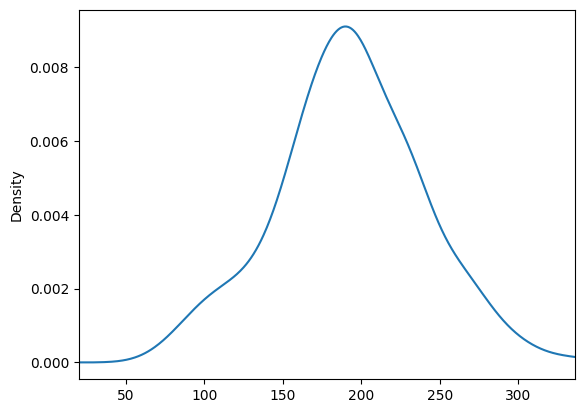

In [341]:
df.loc[df["Профессия"]=="Уборщик",'Отработанные часы'].plot(kind='kde', xlim=[20,df.loc[df["Профессия"]=="Уборщик",'Отработанные часы'].max()])

Посмотрим на графики распределения отработанных часов

In [342]:
fig = go.Figure()
fig.add_trace(go.Box(x=df["Отработанные часы"], name='Отработанные часы'))

fig.show()

Вывод: данные графики подтверждают 168 рабочих часов для нормального производства, и 156 часов для вредного. (1-й квартиль). НО ВВИДУ ТОГО ЧТО ДАННЫЕ СИНТЕТИЧЕСКИЕ ЗА ОКЛАД ВОЗЬМЕМ ДАННЫЕ ПРИ МИНИМАЛЬНОМ ЗНАЧЕНИИ ОТРАБОТАННЫХ ЧАСОВ 96.

Посмотрим на DF в разрезе Отработанных часов

In [343]:
df_96 = df_d[df_d['Отработанные часы']==96]

In [344]:
df_96.groupby(['Профессия', 'Разряд', 'Класс вредности', "Объем производства"]).agg({'Доход (руб.)': ['min']}). reset_index()

,Профессия,Разряд,Класс вредности,Объем производства,Доход (руб.)
,,,,,min
0,Вальцовщик,5,3.3,890,13106.76
1,Вальцовщик,6,3.3,890,14263.39
2,Вальцовщик,7,3.3,890,15547.24
3,Контролер качества готовой продукции,7,1.0,890,12955.24
4,Нагревальщик металла,4,3.4,890,12640.76
5,Нагревальщик металла,5,3.4,890,13682.76
6,Огнеупорщик,4,3.1,890,11056.76
7,Оператор поста управления,4,2.0,890,10624.76
8,Оператор поста управления,5,2.0,890,11666.76


ВЫВОД: эти цифры мы возьмем за отправную точку для расчета оклада

#Расcмотрим признак Вредность (доплата за вредность 27 руб за отработанный час)

В соответствии со ст. 14 Закона № 426-ФЗ условия труда подразделяются на четыре класса:

1-й класс (оптимальные);

2-й класс (допустимые);

3-й класс (вредные), который включает четыре подкласса (степени) вредности:

3.1 (вредные условия труда 1-й степени)
3.2 (вредные условия труда 2-й степени)
3.3 (вредные условия труда 3-й степени)
3.4 (вредные условия труда 4-й степени)

Вредность, посмотрим на распределение профессий по вредности производства.

In [345]:
df.groupby(["Профессия"])["Класс вредности"].unique()

Профессия
Вальцовщик                                   [3.3]
Контролер качества готовой продукции         [1.0]
Нагревальщик металла                         [3.4]
Огнеупорщик                                  [3.1]
Оператор поста управления                    [2.0]
Подручный вальцовщика                        [3.3]
Посадчик металла                             [3.4]
Резчик горячего металла                      [3.2]
Уборщик                                 [1.0, 3.3]
Name: Класс вредности, dtype: object

Вывод: несколько видов вредности есть только у уборщиков и из этих данных мы воьмем дополнение к окладу за вредность

Значение вредности у уборщиков бывает либо 1, либо 3.3. Определим какое минимальное значение при вредности

In [346]:

l=df[(df["Профессия"]=="Уборщик" ) & (df["Класс вредности"]>3)]
l["Доход (руб.)"].min()

11126.02

Определим минимальное значение доходов по каждой из профессий - базовый оклад

In [347]:
profit=df.groupby(["Профессия", ])["Доход (руб.)"].min().reset_index()
profit["Доход (руб.)"][0]

13106.76

In [348]:
Сleaners = df[df["Доход (руб.)"]==profit.iloc[8]["Доход (руб.)"]]
Сleaners

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
1816,1817,Григорьев А. Т.,Уборщик,3,Вспомогательные помещения,1.0,2022-10,96,890,8534.02
1817,1818,Клюев Д. М.,Уборщик,3,Вспомогательные помещения,1.0,2022-10,96,890,8534.02
1821,1822,Чернышев Д. В.,Уборщик,3,Вспомогательные помещения,1.0,2022-10,96,890,8534.02


Получение значения дополнительных начислений за вредность

In [349]:
abs(Сleaners["Доход (руб.)"].unique()-l["Доход (руб.)"].min())/Сleaners["Отработанные часы"].unique()


array([27.])

Посмотрим в динамике по времени

In [350]:
p=72
for i in range(len(sorted(df["Отработанные часы"].unique()))):
  for x in j:
    V_Z=df[(df['Профессия']=='Уборщик') & (df['Объем производства']==x) & (df['Разряд']==3) & (df['Отработанные часы']==p)]['Доход (руб.)'].max()-df[(df['Профессия']=='Уборщик') & (df['Объем производства']==x) & (df['Разряд']==3) & (df['Отработанные часы']==p)]['Доход (руб.)'].min()
    V=V_Z/p
    if (math.isnan(V)):
        continue
    else:
        print('Отработанные часы:', p, 'доплата за вредность в часах:', V)

  p+=12

Отработанные часы: 96 доплата за вредность в часах: 27.0
Отработанные часы: 108 доплата за вредность в часах: 27.0
Отработанные часы: 120 доплата за вредность в часах: 0.0
Отработанные часы: 120 доплата за вредность в часах: 0.0
Отработанные часы: 132 доплата за вредность в часах: 0.0
Отработанные часы: 132 доплата за вредность в часах: 27.0
Отработанные часы: 144 доплата за вредность в часах: 0.0
Отработанные часы: 144 доплата за вредность в часах: 0.0
Отработанные часы: 156 доплата за вредность в часах: 0.0
Отработанные часы: 156 доплата за вредность в часах: 0.0
Отработанные часы: 156 доплата за вредность в часах: 27.0
Отработанные часы: 156 доплата за вредность в часах: 0.0
Отработанные часы: 156 доплата за вредность в часах: 0.0
Отработанные часы: 156 доплата за вредность в часах: 0.0
Отработанные часы: 168 доплата за вредность в часах: 26.99999999999999
Отработанные часы: 168 доплата за вредность в часах: 0.0
Отработанные часы: 168 доплата за вредность в часах: 0.0
Отработанные ч

**Вывод: доплата за вредность 27 рублей за 1 час**

#Добавим столбец Коэффициента вредного производства Квр

In [351]:
def correct_k(x, threshold):
    if x['Класс вредности'] > threshold:
        return x['Отработанные часы']*27
    return 0



df['Квр'] = df.apply ( lambda x: correct_k(x, 3), axis=1)
df

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,180,1950,NaN,0
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,228,1950,NaN,0
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,252,1950,NaN,0
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01,240,1950,NaN,6480
4,5,Волков Д. М.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01,252,1950,NaN,6804
...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,Румянцев М. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12,180,1500,NaN,4860
2396,2397,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,180,1500,NaN,4860
2397,2398,Власов С. Д.,Вальцовщик,8,Прошивной стан,3.3,2022-12,156,1500,NaN,4212
2398,2399,Волков А. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,192,1500,NaN,5184


#Рассмотрим признак Профессия

In [352]:
df["Профессия"].unique()

array(['Уборщик', 'Подручный вальцовщика', 'Оператор поста управления',
       'Нагревальщик металла', 'Посадчик металла', 'Огнеупорщик',
       'Резчик горячего металла', 'Вальцовщик',
       'Контролер качества готовой продукции'], dtype=object)

In [353]:
df["Профессия"].value_counts()

Вальцовщик                              612
Нагревальщик металла                    504
Подручный вальцовщика                   360
Оператор поста управления               324
Уборщик                                 252
Контролер качества готовой продукции    108
Посадчик металла                         96
Резчик горячего металла                  84
Огнеупорщик                              60
Name: Профессия, dtype: int64

In [354]:
df.loc[df["Профессия"]=="Нагревальщик металла","FIO"].unique()

array(['Голиков Г. И.', 'Ильин Э. П.', 'Колпаков И. А.', 'Михайлов М. М.',
       'Некрасов И. А.', 'Никитин Л. Г.', 'Новиков А. В.',
       'Сорокин М. Д.', 'Чеботарев Д. И.', 'Алексеев Н. Н.',
       'Васильев С. В.', 'Власов В. Д.', 'Воробьев Н. П.',
       'Игнатьев В. Г.', 'Ильин К. Д.', 'Лазарев Д. А.', 'Потапов В. М.',
       'Высоцкий М. А.', 'Ефимов В. Н.', 'Карпов А. М.', 'Кузнецов А. С.',
       'Лебедев М. Д.', 'Русанов Т. И.', 'Свиридов А. К.',
       'Филатов К. Т.', 'Фролов Д. М.', 'Бородин Г. И.', 'Волошин Л. И.',
       'Соколов С. Д.', 'Ульянов Э. Д.', 'Аксенов Е. Н.', 'Комаров Л. Ф.',
       'Косарев А. М.', 'Морозов Д. З.', 'Панов Я. Ф.', 'Чернов И. А.',
       'Козлов А. Н.', 'Максимов Р. М.', 'Пахомов Д. С.', 'Соколов С. С.',
       'Чернов С. Е.', 'Шаповалов А. Р.'], dtype=object)

In [355]:
df[df["FIO"].isin(["Колпаков И. А.","Морозов Д. З."])]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
54,55,Колпаков И. А.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-01,240,1950,41762.20,6480
163,164,Морозов Д. З.,Нагревальщик металла,7,Нагревательные печи,3.4,2022-01,204,1950,42672.34,5508
254,255,Колпаков И. А.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-02,204,1460,30845.25,5508
363,364,Морозов Д. З.,Нагревальщик металла,7,Нагревательные печи,3.4,2022-02,156,1460,26651.38,4212
454,455,Колпаков И. А.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-03,156,1430,20541.23,4212
563,564,Морозов Д. З.,Нагревальщик металла,7,Нагревательные печи,3.4,2022-03,168,1430,28215.67,4536
654,655,Колпаков И. А.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-04,192,1790,29481.11,5184
763,764,Морозов Д. З.,Нагревальщик металла,7,Нагревательные печи,3.4,2022-04,216,1790,45572.67,5832
854,855,Колпаков И. А.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-05,204,1490,30413.90,5508
963,964,Морозов Д. З.,Нагревальщик металла,7,Нагревательные печи,3.4,2022-05,156,1490,26200.26,4212


In [356]:
df.loc[df["Профессия"]=="Огнеупорщик","FIO"].unique()

array(['Иванов П. А.', 'Куликов М. В.', 'Соколов И. А.', 'Суворов И. Р.',
       'Ткачев И. Я.'], dtype=object)

In [357]:
df[df["FIO"].isin(["Иванов П. А.","Суворов И. Р."]) & (df['Отработанные часы']==240)]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
66,67,Суворов И. Р.,Огнеупорщик,4,Нагревательные печи,3.1,2022-01,240,1950,37802.20,6480
666,667,Суворов И. Р.,Огнеупорщик,4,Нагревательные печи,3.1,2022-04,240,1790,37035.72,6480
1051,1052,Иванов П. А.,Огнеупорщик,4,Нагревательные печи,3.1,2022-06,240,2250,40666.94,6480


При абслютно одинаковых профессиях у работников отражены разные зарплаты, это говорит о том что специалисты имеют разные разряды, количество отработанных часов и объем производства

In [358]:
df[(df['Профессия'] == 'Оператор поста управления')  & (df['Отработанные часы']==240)]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
41,42,Орлов В. В.,Оператор поста управления,4,Калибровочный стан,2.0,2022-01,240,1950,36722.20,0
92,93,Андреев Ф. Д.,Оператор поста управления,5,Калибровочный стан,2.0,2022-01,240,1950,40444.84,0
94,95,Герасимов К. Я.,Оператор поста управления,5,Калибровочный стан,2.0,2022-01,240,1950,40444.84,0
111,112,Комаров Д. А.,Оператор поста управления,5,"Калибровочный стан, ГРП",2.0,2022-01,240,1950,40444.84,0
635,636,Виноградов П. Д.,Оператор поста управления,4,Калибровочный стан,2.0,2022-04,240,1790,35955.72,0
640,641,Носов М. Д.,Оператор поста управления,4,Калибровочный стан,2.0,2022-04,240,1790,35955.72,0
645,646,Терехов И. К.,Оператор поста управления,4,Калибровочный стан,2.0,2022-04,240,1790,35955.72,0
646,647,Чернов М. К.,Оператор поста управления,4,Калибровочный стан,2.0,2022-04,240,1790,35955.72,0
712,713,Михайлов Р. С.,Оператор поста управления,5,"Калибровочный стан, ГРП",2.0,2022-04,240,1790,NaN,0
714,715,Щукин К. С.,Оператор поста управления,5,"Калибровочный стан, ГРП",2.0,2022-04,240,1790,39594.05,0


Определим минимальное значение доходов по каждой из профессий

In [359]:
profit=df.groupby(["Профессия"])["Доход (руб.)"].min().reset_index()
profit

,Профессия,Доход (руб.)
0,Вальцовщик,13106.76
1,Контролер качества готовой продукции,12955.24
2,Нагревальщик металла,11972.42
3,Огнеупорщик,11056.76
4,Оператор поста управления,9296.66
5,Подручный вальцовщика,11126.02
6,Посадчик металла,12640.76
7,Резчик горячего металла,11776.76
8,Уборщик,8534.02


#Рассмотрим признак Разряд

Посмотрим уникальные записи для каждой из профессий признака Разряд

In [360]:
df.groupby(["Профессия"])["Разряд"].unique()

Профессия
Вальцовщик                                 [5, 6, 7, 8]
Контролер качества готовой продукции             [7, 8]
Нагревальщик металла                    [4, 5, 6, 7, 8]
Огнеупорщик                                         [4]
Оператор поста управления                        [4, 5]
Подручный вальцовщика                         [2, 3, 4]
Посадчик металла                                    [4]
Резчик горячего металла                             [4]
Уборщик                                          [2, 3]
Name: Разряд, dtype: object

In [361]:
df_new=df
df_new

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,180,1950,NaN,0
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,228,1950,NaN,0
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,252,1950,NaN,0
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01,240,1950,NaN,6480
4,5,Волков Д. М.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01,252,1950,NaN,6804
...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,Румянцев М. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12,180,1500,NaN,4860
2396,2397,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,180,1500,NaN,4860
2397,2398,Власов С. Д.,Вальцовщик,8,Прошивной стан,3.3,2022-12,156,1500,NaN,4212
2398,2399,Волков А. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,192,1500,NaN,5184


Ввиду того что по 108 РЧ более полные данные, разбивку по доплате за разряды будем делать по этой величине

In [362]:
df_108=df[df['Отработанные часы']==108]

Доход специалистов при 108 РЧ

In [363]:
profit=df_108.groupby(["Профессия"])["Доход (руб.)"].min().reset_index()
profit

,Профессия,Доход (руб.)
0,Вальцовщик,14745.11
1,Контролер качества готовой продукции,14574.64
2,Нагревальщик металла,14220.85
3,Огнеупорщик,12438.85
4,Оператор поста управления,11952.85
5,Подручный вальцовщика,12516.77
6,Посадчик металла,14220.85
7,Резчик горячего металла,13248.85
8,Уборщик,9600.77


In [364]:
df_108.groupby(["Профессия", "Разряд", 'Отработанные часы'])["Доход (руб.)"].min().reset_index().tail(50)

,Профессия,Разряд,Отработанные часы,Доход (руб.)
0,Вальцовщик,5,108,14745.11
1,Вальцовщик,6,108,16046.31
2,Вальцовщик,7,108,17490.64
3,Вальцовщик,8,108,NaN
4,Контролер качества готовой продукции,7,108,14574.64
5,Контролер качества готовой продукции,8,108,NaN
6,Нагревальщик металла,4,108,14220.85
7,Нагревальщик металла,5,108,15393.11
8,Нагревальщик металла,6,108,16694.31
9,Нагревальщик металла,7,108,18138.64


Рассмотрим влияение значения 'Разряда' на 'Доход' по всем профессиям

#Вальцовщик

In [365]:
basic_V = df_108[df_108["Доход (руб.)"]==profit.iloc[0]["Доход (руб.)"]]
basic_V=basic_V[basic_V['Профессия']=='Вальцовщик']
basic_V

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
1891,1892,Андреев Е. А.,Вальцовщик,5,Калибровочный стан,3.3,2022-10,108,890,14745.11,2916
1898,1899,Кузнецов Д. М.,Вальцовщик,5,Калибровочный стан,3.3,2022-10,108,890,14745.11,2916
1901,1902,Михайлов С. М.,Вальцовщик,5,Калибровочный стан,3.3,2022-10,108,890,14745.11,2916
1903,1904,Поляков Д. А.,Вальцовщик,5,Калибровочный стан,3.3,2022-10,108,890,14745.11,2916
1905,1906,Терентьев М. Д.,Вальцовщик,5,Калибровочный стан,3.3,2022-10,108,890,14745.11,2916
1908,1909,Щербаков А. М.,Вальцовщик,5,Калибровочный стан,3.3,2022-10,108,890,14745.11,2916
1935,1936,Козлов Г. И.,Вальцовщик,5,Пилигримовые станы,3.3,2022-10,108,890,14745.11,2916
1937,1938,Дьяконов М. Т.,Вальцовщик,5,Прошивной стан,3.3,2022-10,108,890,14745.11,2916
1938,1939,Зверев М. М.,Вальцовщик,5,Прошивной стан,3.3,2022-10,108,890,14745.11,2916
1941,1942,Морозов Г. А.,Вальцовщик,5,Прошивной стан,3.3,2022-10,108,890,14745.11,2916


In [366]:
v5=df_108[(df_108["Профессия"]=="Вальцовщик" ) & (df_108["Разряд"]==5)]
v5min=v5["Доход (руб.)"].min()
v6=df_108[(df_108["Профессия"]=="Вальцовщик" ) & (df_108["Разряд"]==6)]
v6min=v6["Доход (руб.)"].min()
v7=df_108[(df_108["Профессия"]=="Вальцовщик" ) & (df_108["Разряд"]==7)]
v7min=v7["Доход (руб.)"].min()
v8=df_108[(df_108["Профессия"]=="Вальцовщик" ) & (df_108["Разряд"]==8)]
v8min=v8["Доход (руб.)"].min()

In [367]:
print("Минимальный  доход Вальцовщика при разряде: \n5-", v5min, '\n6-', v6min, '\n7-', v7min, '\n8-', v8min )
print('Разница между доходами разрядов 6 и 5, 7 и 6, 8 и 7:',round(v6min-v5min, 2), round(v7min-v6min, 2), round(v8min-v7min, 2))
print('Доплата за разряд:', round(abs(round(v6min-v5min, 2) - round(v7min-v6min, 2)),  2))

Минимальный  доход Вальцовщика при разряде: 
5- 14745.11 
6- 16046.31 
7- 17490.64 
8- nan
Разница между доходами разрядов 6 и 5, 7 и 6, 8 и 7: 1301.2 1444.33 nan
Доплата за разряд: 143.13


#Контролер качества готовой продукции

In [368]:
basic_KK = df_108[df_108["Доход (руб.)"]==profit.iloc[1]["Доход (руб.)"]]
basic_KK=basic_KK[basic_KK['Профессия']=='Контролер качества готовой продукции']
basic_KK

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
1954,1955,Горюнов Д. Т.,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,1.0,2022-10,108,890,14574.64,0
1955,1956,Гусев Р. И.,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,1.0,2022-10,108,890,14574.64,0
1958,1959,Соколов Ф. М.,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,1.0,2022-10,108,890,14574.64,0
2155,2156,Гусев Р. И.,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,1.0,2022-11,108,1200,14574.64,0


In [369]:
kk7=df_108[(df_108["Профессия"]=="Контролер качества готовой продукции" ) & (df_108["Разряд"]==7)]
kk7min=kk7["Доход (руб.)"].min()
kk8=df_108[(df_108["Профессия"]=="Контролер качества готовой продукции" ) & (df_108["Разряд"]==8)]
kk8min=kk8["Доход (руб.)"].min()

In [370]:
print('Минимальный  доход Контролерa качества готовой продукции при разряде: \n7-', kk7min, '\n8-', kk8min )
print('Разница между доходами разрядов 8 и 7:', round(kk8min-kk7min, 2))

Минимальный  доход Контролерa качества готовой продукции при разряде: 
7- 14574.64 
8- nan
Разница между доходами разрядов 8 и 7: nan


# Нагревальщик металла

In [371]:
basic_NM = df_108[df_108["Доход (руб.)"]==profit.iloc[2]["Доход (руб.)"]]
basic_NM=basic_NM[basic_NM['Профессия']=='Нагревальщик металла']
basic_NM

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
1854,1855,Колпаков И. А.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-10,108,890,14220.85,2916
1859,1860,Некрасов И. А.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-10,108,890,14220.85,2916
1860,1861,Никитин Л. Г.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-10,108,890,14220.85,2916


In [372]:
nm4=df_108[(df_108["Профессия"]=="Нагревальщик металла" ) & (df_108["Разряд"]==4)]
nm4min=nm4["Доход (руб.)"].min()
nm5=df_108[(df_108["Профессия"]=="Нагревальщик металла" ) & (df_108["Разряд"]==5)]
nm5min=nm5["Доход (руб.)"].min()
nm6=df_108[(df_108["Профессия"]=="Нагревальщик металла" ) & (df_108["Разряд"]==6)]
nm6min=nm6["Доход (руб.)"].min()
nm7=df_108[(df_108["Профессия"]=="Нагревальщик металла" ) & (df_108["Разряд"]==7)]
nm7min=nm7["Доход (руб.)"].min()
nm8=df_108[(df_108["Профессия"]=="Нагревальщик металла" ) & (df_108["Разряд"]==8)]
nm8min=nm8["Доход (руб.)"].min()

In [373]:
print("Минимальный  доход Нагревальщик металла при разряде: \n4-", nm4min, '\n5-', nm5min, '\n6-', nm6min, '\n7-', nm7min, '\n8-', nm8min, '.' )
print('Разница между доходами разрядов 5 и 4, 6 и 5, 7 и 6, 8 и 7:',round(nm5min-nm4min, 2),round(nm6min-nm5min, 2), round(nm7min-nm6min, 2), round(nm8min-nm7min, 2))

Минимальный  доход Нагревальщик металла при разряде: 
4- 14220.85 
5- 15393.11 
6- 16694.31 
7- 18138.64 
8- nan .
Разница между доходами разрядов 5 и 4, 6 и 5, 7 и 6, 8 и 7: 1172.26 1301.2 1444.33 nan


In [374]:
print("Минимальный  доход Нагревальщик металла при разряде: \n4-", nm4min, '\n5-', nm5min, '\n6-', nm6min, '\n7-', nm7min, '\n8-', nm8min, '.' )
print('Разница между доходами разрядов 5 и 4, 6 и 5, 7 и 6, 8 и 7:',round(nm5min-nm4min, 2),round(nm6min-nm5min, 2), round(nm7min-nm6min, 2), round(nm8min-nm7min, 2))
print('Доплата за разряд:', round(abs(round(nm5min-nm4min, 2) - round(nm6min-nm5min, 2)),  2), round(abs(round(nm7min-nm6min, 2) - round(nm6min-nm5min, 2)),  2))

Минимальный  доход Нагревальщик металла при разряде: 
4- 14220.85 
5- 15393.11 
6- 16694.31 
7- 18138.64 
8- nan .
Разница между доходами разрядов 5 и 4, 6 и 5, 7 и 6, 8 и 7: 1172.26 1301.2 1444.33 nan
Доплата за разряд: 128.94 143.13


#Огнеупорщик

Огнеупорщик имеет только 1 разряд - 4

#Оператор поста управления

In [375]:
basic_OPU = df_108[df_108["Доход (руб.)"]==profit.iloc[4]["Доход (руб.)"]]
basic_OPU=basic_OPU[basic_OPU['Профессия']=='Оператор поста управления']
basic_OPU

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
1839,1840,Никулин Е. А.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,108,890,11952.85,0
1840,1841,Носов М. Д.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,108,890,11952.85,0
1842,1843,Романов Р. К.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,108,890,11952.85,0


In [376]:
opu4=df_108[(df_108["Профессия"]=="Оператор поста управления" ) & (df_108["Разряд"]==4)]
opu4min=opu4["Доход (руб.)"].min()
opu5=df_108[(df_108["Профессия"]=="Оператор поста управления" ) & (df_108["Разряд"]==5)]
opu5min=opu5["Доход (руб.)"].min()


In [377]:
print("Минимальный  доход Оператор поста управления при разряде: \n4-", opu4min, '\n5-', opu5min)
print('Разница между доходами разрядов 5 и 4:',round(opu5min-opu4min, 2))

Минимальный  доход Оператор поста управления при разряде: 
4- 11952.85 
5- 13125.11
Разница между доходами разрядов 5 и 4: 1172.26


#Подручный вальцовщика

In [378]:
basic_PV = df_108[df_108["Доход (руб.)"]==profit.iloc[5]["Доход (руб.)"]]
basic_PV=basic_PV[basic_PV['Профессия']=='Подручный вальцовщика']
basic_PV

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
1827,1828,Карташов Д. С.,Подручный вальцовщика,3,Пилигримовые станы,3.3,2022-10,108,890,12516.77,2916
1831,1832,Семенов И. П.,Подручный вальцовщика,3,Пилигримовые станы,3.3,2022-10,108,890,12516.77,2916
1832,1833,Усов О. А.,Подручный вальцовщика,3,Пилигримовые станы,3.3,2022-10,108,890,12516.77,2916
1833,1834,Чистяков Я. Я.,Подручный вальцовщика,3,Пилигримовые станы,3.3,2022-10,108,890,12516.77,2916


In [379]:
pv3=df_108[(df_108["Профессия"]=="Подручный вальцовщика" ) & (df_108["Разряд"]==3)]
pv3min=pv3["Доход (руб.)"].min()
pv4=df_108[(df_108["Профессия"]=="Подручный вальцовщика" ) & (df_108["Разряд"]==4)]
pv4min=pv4["Доход (руб.)"].min()
pv5=df_108[(df_108["Профессия"]=="Подручный вальцовщика" ) & (df_108["Разряд"]==5)]
pv5min=pv5["Доход (руб.)"].min()

In [380]:
print("Минимальный  доход Подручного вальцовщика при разряде: \n3-", pv3min, '\n4-', pv4min, '\n5-', pv5min)
print('Разница между доходами разрядов 4 и 3, 5 и 4:',round(pv4min-pv3min, 2), round(pv5min-pv4min, 2))

Минимальный  доход Подручного вальцовщика при разряде: 
3- 12516.77 
4- 13572.85 
5- nan
Разница между доходами разрядов 4 и 3, 5 и 4: 1056.08 nan


#Посадчик металла

Посадчик металла  имеет только 1 разряд - 4

#Резчик горячего металла

Резчик горячего металла имеет только 1 разряд - 4


#Уборщик

In [381]:
basic_U = df_108[df_108["Доход (руб.)"]==profit.iloc[5]["Доход (руб.)"]]
basic_U=basic_U[basic_U['Профессия']=='Уборщик']
basic_U

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
1828,1829,Потапов М. И.,Уборщик,3,Пилигримовые станы,3.3,2022-10,108,890,12516.77,2916


In [382]:
u2=df_108[(df_108["Профессия"]=="Уборщик" ) & (df_108["Разряд"]==2)]
u2min=u2["Доход (руб.)"].min()
u3=df_108[(df_108["Профессия"]=="Уборщик" ) & (df_108["Разряд"]==3)]
u3min=u3["Доход (руб.)"].min()

In [383]:
print("Минимальный  доход Уборщик при разряде: \n2-", u2min, '\n3-', u3min)
print('Разница между доходами разрядов 3 и 2:',round(u3min-u2min, 2))

Минимальный  доход Уборщик при разряде: 
2- nan 
3- 9600.77
Разница между доходами разрядов 3 и 2: nan


# Расчет коэффициента разряда

In [384]:
print('Вальцовщик')
print("Минимальный  доход Вальцовщика при разряде: \n5-", v5min, '\n6-', v6min, '\n7-', v7min, '\n8-', v8min )
print('Разница между доходами разрядом 6 и 5:', round(v6min-v5min, 2), '.  7 и 6:', round(v7min-v6min, 2), '.  8 и 7:',  round(v8min-v7min, 2))
print('Доплата за разряд:', round(abs(round(v6min-v5min, 2) - round(v7min-v6min, 2)),  2))

print('Нагревальщик металла')
print("Минимальный  доход Нагревальщик металла при разряде: \n4-", nm4min, '\n5-', nm5min, '\n6-', nm6min, '\n7-', nm7min, '\n8-', nm8min, '.' )
print('Разница между доходами разрядом 5 и 4, 6 и 5, 7 и 6, 8 и 7:',round(nm5min-nm4min, 2),round(nm6min-nm5min, 2), round(nm7min-nm6min, 2), round(nm8min-nm7min, 2))
print('Доплата за разряд:', round(abs(round(nm5min-nm4min, 2) - round(nm6min-nm5min, 2)),  2), round(abs(round(nm7min-nm6min, 2) - round(nm6min-nm5min, 2)),  2))

print('Оператор поста управления')
print("Минимальный  доход Оператор поста управления при разряде: \n4-", opu4min, '\n5-', opu5min, '.' )
print('Разница между доходами разрядом 5 и 4:',round(opu5min-opu4min, 2))

print('Подручного вальцовщика')
print("Минимальный  доход Подручного вальцовщика при разряде: \n3-", pv3min, '\n4-', pv4min, '\n5-', pv5min)
print('Разница между доходами разрядом 4 и 3, 5 и 4:',round(pv4min-pv3min, 2), round(pv5min-pv4min, 2))

print('Уборщик')
print("Минимальный  доход Уборщик при разряде: \n2-", u2min, '\n3-', u3min)
print('Разница между доходами разрядом 3 и 2:',round(u3min-u2min, 2))

Вальцовщик
Минимальный  доход Вальцовщика при разряде: 
5- 14745.11 
6- 16046.31 
7- 17490.64 
8- nan
Разница между доходами разрядом 6 и 5: 1301.2 .  7 и 6: 1444.33 .  8 и 7: nan
Доплата за разряд: 143.13
Нагревальщик металла
Минимальный  доход Нагревальщик металла при разряде: 
4- 14220.85 
5- 15393.11 
6- 16694.31 
7- 18138.64 
8- nan .
Разница между доходами разрядом 5 и 4, 6 и 5, 7 и 6, 8 и 7: 1172.26 1301.2 1444.33 nan
Доплата за разряд: 128.94 143.13
Оператор поста управления
Минимальный  доход Оператор поста управления при разряде: 
4- 11952.85 
5- 13125.11 .
Разница между доходами разрядом 5 и 4: 1172.26
Подручного вальцовщика
Минимальный  доход Подручного вальцовщика при разряде: 
3- 12516.77 
4- 13572.85 
5- nan
Разница между доходами разрядом 4 и 3, 5 и 4: 1056.08 nan
Уборщик
Минимальный  доход Уборщик при разряде: 
2- nan 
3- 9600.77
Разница между доходами разрядом 3 и 2: nan


Получаем сведенные данные по разрядам:

In [385]:
print('Разница между 3 и 4 разрядом:', round(pv4min-pv3min, 2))
print('Разница между 4 и 5 разрядом:', round(nm5min-nm4min, 2))
print('Разница между 5 и 6 разрядом:', round(nm6min-nm5min, 2))
print('Разница между 6 и 7 разрядом:', round(nm7min-nm6min, 2))


Разница между 3 и 4 разрядом: 1056.08
Разница между 4 и 5 разрядом: 1172.26
Разница между 5 и 6 разрядом: 1301.2
Разница между 6 и 7 разрядом: 1444.33


Проверка на совпадение зачений разности между пересекающимися разрядами

In [386]:
k34_45=round(abs((pv4min-pv3min)-(nm5min-nm4min)), 2)
k45_56=round(abs((nm5min-nm4min)-(nm6min-nm5min)), 2)
k56_67=round(abs((nm6min-nm5min)-(nm7min-nm6min)), 2)
k34_45, k45_56, k56_67

(116.18, 128.94, 143.13)

In [387]:
k345_456 = round((k45_56-k34_45), 2)
k456_567 = round((k56_67 - k45_56), 2)
Kr = round((k456_567 - k345_456), 2)
k345_456, k456_567, Kr

(12.76, 14.19, 1.43)

Рассчитаем доплату для 2 и 8 разряда

In [388]:
k234_345=k345_456-Kr
k567_678=k456_567+Kr
k234_345, k567_678
k23_34=round((k34_45-k234_345), 2)
k67_78=round((k56_67+k567_678), 2)
k23_34, k67_78

(104.85, 158.75)

In [389]:
D_2=round(((pv4min-pv3min-k23_34)), 2)
D_8=round((nm7min-nm6min+k67_78), 2)
D_2, D_8

(951.23, 1603.08)

Проверка

In [390]:
print('Рассчитанная разница  2 и 3 разрядом:     ', D_2)
print('─' * 50)
print('Реальная разница между 3 и 4 разрядом:    ', round(pv4min-pv3min, 2))
print('Рассчитанная разница между 3 и 4 разрядом:', D_2+k23_34)
print('─' * 50)
print('Реальная разница между 4 и 5 разрядом:    ', round(nm5min-nm4min, 2))
print('Рассчитанная разница 4 и 5 разрядом:      ', D_2+k23_34+k34_45)
print('─' * 50)
print('Реальная разница между 5 и 6 разрядом:    ', round(nm6min-nm5min, 2))
print('Рассчитанная разница 5 и 6 разрядом:      ', D_2+k23_34+k34_45+k45_56)
print('─' * 50)
print('Реальная разница 6 и 7 разрядом:          ', round(nm7min-nm6min, 2))
print('Рассчитанная разница  6 и 7 разрядом:     ', D_2+k23_34+k34_45+k45_56+k56_67)
print('─' * 50)
print('Рассчитанная разница  7 и 8 разрядом:     ', D_2+k23_34+k34_45+k45_56+k56_67+k67_78)

Рассчитанная разница  2 и 3 разрядом:      951.23
──────────────────────────────────────────────────
Реальная разница между 3 и 4 разрядом:     1056.08
Рассчитанная разница между 3 и 4 разрядом: 1056.08
──────────────────────────────────────────────────
Реальная разница между 4 и 5 разрядом:     1172.26
Рассчитанная разница 4 и 5 разрядом:       1172.26
──────────────────────────────────────────────────
Реальная разница между 5 и 6 разрядом:     1301.2
Рассчитанная разница 5 и 6 разрядом:       1301.2
──────────────────────────────────────────────────
Реальная разница 6 и 7 разрядом:           1444.33
Рассчитанная разница  6 и 7 разрядом:      1444.33
──────────────────────────────────────────────────
Рассчитанная разница  7 и 8 разрядом:      1603.08


Введем на основании проверяддых данных коэффициенты

In [391]:
K3=D_2
K4=D_2+k23_34
K5=D_2+k23_34+k34_45
K6=D_2+k23_34+k34_45+k45_56
K7=D_2+k23_34+k34_45+k45_56+k56_67
K8=D_2+k23_34+k34_45+k45_56+k56_67+k67_78
K3, K4, K5, K6, K7, K8

(951.23, 1056.08, 1172.26, 1301.2, 1444.33, 1603.08)

Вывод: дополнительные  начисления за разряд по всем записям:
максимальный разряд по некоторым записям: 8, а минимальный: 2
Получилась система: при рарядах, выше 3-его, начисляется доп. выплата:

для разряда 2: Базовый оклад

для разряда 3: Базовый оклад + K3

для разряда 4: Базовый оклад + K3 + K4

для разряда 5: Базовый оклад + K3 + K4 + K5

для разряда 6: Базовый оклад + K3 + K4 + K5 + K6

для разряда 7: Базовый оклад + K3 + K4 + K5 + K6 + K7

для разряда 8: Базовый оклад + K3 + K4 + K5 + K6 + K7 + K8


Проверка

In [392]:
df[(df['Отработанные часы']==108) & (df['Профессия']=='Нагревальщик металла')& (df['Разряд']==4)].head(2)

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
1848,1849,Голиков Г. И.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-10,108,890,NaN,2916
1854,1855,Колпаков И. А.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-10,108,890,14220.85,2916


In [393]:
df[(df['Отработанные часы']==108) & (df['Профессия']=='Нагревальщик металла')& (df['Разряд']==5)].head(2)

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр
1917,1918,Алексеев Н. Н.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-10,108,890,15393.11,2916
1918,1919,Васильев С. В.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-10,108,890,NaN,2916


In [394]:
dr=df[(df['Отработанные часы']==108) & (df['Профессия']=='Нагревальщик металла')& (df['Разряд']==4)]['Доход (руб.)']+K5
dr

1848         NaN
1854    15393.11
1859    15393.11
1860    15393.11
Name: Доход (руб.), dtype: float64

Вывод: проверка пройдена

#Добавляем столбец Коэффициент Разрада - Кр

In [395]:
def correct_clicks(x):
    if x == 2:
        return 0
    elif x ==3:
        return 951.23
    if x == 4:
        return 951.23 + 1056.08
    elif x ==5:
        return 951.23 + 1056.08 + 1172.26
    if x == 6:
        return 951.23 + 1056.08 + 1172.26 + 1301.2
    elif x ==7:
        return 951.23 + 1056.08 + 1172.26 + 1301.2 + 1444.33
    else:
        return 951.23 + 1056.08 + 1172.26 + 1301.2 + 1444.33 + 1603.08

df['Кр'] = df['Разряд'].apply(correct_clicks)

In [396]:
df.tail()

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
2395,2396,Румянцев М. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12,180,1500,NaN,4860,7528.18
2396,2397,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,180,1500,NaN,4860,7528.18
2397,2398,Власов С. Д.,Вальцовщик,8,Прошивной стан,3.3,2022-12,156,1500,NaN,4212,7528.18
2398,2399,Волков А. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,192,1500,NaN,5184,7528.18
2399,2400,Новиков А. Ф.,Вальцовщик,8,Прошивной стан,3.3,2022-12,192,1500,NaN,5184,7528.18


#Рассмотрим признак Доход

Вернемся к изначальным данным

In [397]:
profit=df.groupby(["Профессия"])["Доход (руб.)"].min().reset_index()
profit

,Профессия,Доход (руб.)
0,Вальцовщик,13106.76
1,Контролер качества готовой продукции,12955.24
2,Нагревальщик металла,11972.42
3,Огнеупорщик,11056.76
4,Оператор поста управления,9296.66
5,Подручный вальцовщика,11126.02
6,Посадчик металла,12640.76
7,Резчик горячего металла,11776.76
8,Уборщик,8534.02


Вычислим значение дохода по каждой из профессий - базовый оклад (если брать по Трудовому кодексу)

In [398]:
profit=df.groupby(['Профессия', 'Разряд', 'Класс вредности'])[['Доход (руб.)', 'Отработанные часы']].min().reset_index()
profit

,Профессия,Разряд,Класс вредности,Доход (руб.),Отработанные часы
0,Вальцовщик,5,3.3,13106.76,96
1,Вальцовщик,6,3.3,14263.39,96
2,Вальцовщик,7,3.3,15547.24,96
3,Вальцовщик,8,3.3,NaN,96
4,Контролер качества готовой продукции,7,1.0,12955.24,96
5,Контролер качества готовой продукции,8,1.0,NaN,108
6,Нагревальщик металла,4,3.4,12640.76,96
7,Нагревальщик металла,5,3.4,11972.42,84
8,Нагревальщик металла,6,3.4,16694.31,108
9,Нагревальщик металла,7,3.4,18138.64,96


Посмотрим есть ли данные по отработанным часам по Нагревальщику металла и Оператор поста управления

In [399]:
df[ (df.Профессия == 'Нагревальщик металла') & (df['Отработанные часы']==96)]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1852,1853,Ильин Э. П.,Нагревальщик металла,4,Нагревательные печи,3.4,2022-10,96,890,12640.76,2592,2007.31
1915,1916,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,3179.57
1922,1923,Ильин К. Д.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-10,96,890,13682.76,2592,3179.57
1932,1933,Филатов К. Т.,Нагревальщик металла,5,"Нагревательные печи, нагрев",3.4,2022-10,96,890,13682.76,2592,3179.57
1933,1934,Фролов Д. М.,Нагревальщик металла,5,"Нагревательные печи, нагрев",3.4,2022-10,96,890,13682.76,2592,3179.57
1961,1962,Комаров Л. Ф.,Нагревальщик металла,7,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,5925.10
1984,1985,Козлов А. Н.,Нагревальщик металла,8,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,7528.18
1985,1986,Максимов Р. М.,Нагревальщик металла,8,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,7528.18
1987,1988,Соколов С. С.,Нагревальщик металла,8,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,7528.18
1988,1989,Чернов С. Е.,Нагревальщик металла,8,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,7528.18


In [400]:
df[df["FIO"].isin(["Сорокин М. Д.","Ильин К. Д."])]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
115,116,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-01,216,1950,NaN,5832,3179.57
122,123,Ильин К. Д.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-01,252,1950,48679.12,6804,3179.57
315,316,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-02,180,1460,NaN,4860,3179.57
322,323,Ильин К. Д.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-02,168,1460,24339.14,4536,3179.57
515,516,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-03,168,1430,NaN,4536,3179.57
522,523,Ильин К. Д.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-03,156,1430,22234.49,4212,3179.57
715,716,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-04,240,1790,NaN,6480,3179.57
722,723,Ильин К. Д.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-04,204,1790,35178.81,5508,3179.57
915,916,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-05,192,1490,NaN,5184,3179.57
922,923,Ильин К. Д.,Нагревальщик металла,5,"Нагревательные печи, кантовка",3.4,2022-05,192,1490,29994.22,5184,3179.57


In [401]:
df[ (df.Профессия == 'Оператор поста управления') & (df['Отработанные часы']==96)]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1835,1836,Виноградов П. Д.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,96,890,10624.76,0,2007.31
1838,1839,Константинов П. Г.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,96,890,10624.76,0,2007.31
1841,1842,Орлов В. В.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,96,890,10624.76,0,2007.31
1845,1846,Терехов И. К.,Оператор поста управления,4,Калибровочный стан,2.0,2022-10,96,890,10624.76,0,2007.31
1911,1912,Комаров Д. А.,Оператор поста управления,5,"Калибровочный стан, ГРП",2.0,2022-10,96,890,11666.76,0,3179.57


Гистограмма Доход   и Объём производства

In [402]:
px.histogram(df, x='Объем производства', y='Доход (руб.)', nbins=100)

Гистограмма Доходов по месяцам

In [403]:
px.histogram(df, x='Месяц', y='Доход (руб.)', nbins=100)

Посмотрим полный список уникальных специальностей (у кого указан доход)

In [404]:
df_d=df[df['Доход (руб.)']>0]
df_d

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
16,17,Григорьев А. Т.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,228,1950,28217.32,0,951.23
17,18,Клюев Д. М.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,240,1950,30488.47,0,951.23
18,19,Кондратьев Д. Д.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,216,1950,25946.17,0,951.23
20,21,Наумов О. В.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,240,1950,30488.47,0,951.23
21,22,Чернышев Д. В.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,228,1950,28217.32,0,951.23
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2377,Курочкин В. М.,Вальцовщик,7,Прошивной стан,3.3,2022-12,180,1500,30770.48,4860,5925.10
2377,2378,Наумов Д. Г.,Вальцовщик,7,Прошивной стан,3.3,2022-12,204,1500,37896.10,5508,5925.10
2378,2379,Попов Е. Ю.,Вальцовщик,7,Прошивной стан,3.3,2022-12,180,1500,30770.48,4860,5925.10
2380,2381,Серебряков А. А.,Вальцовщик,7,Прошивной стан,3.3,2022-12,192,1500,34333.29,5184,5925.10


Вывод: разница в данных между отработанными часами составляет 12 часов (ЧТО ТОЖЕ СТРАННО - обычно разница составляет 1 смену - 8 часов)

Количество значений

In [405]:
df[(df.Профессия == 'Вальцовщик') & (df.Разряд == 6) & (df['Класс вредности']==3.3)& (df['Отработанные часы']==96)]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1947,1948,Агафонов С. И.,Вальцовщик,6,Пилигримовые станы,3.3,2022-10,96,890,14263.39,2592,4480.77
1948,1949,Коротков М. А.,Вальцовщик,6,Пилигримовые станы,3.3,2022-10,96,890,NaN,2592,4480.77


In [406]:
df[ (df.Разряд == 8) & (df['Отработанные часы']==96)]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1984,1985,Козлов А. Н.,Нагревальщик металла,8,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,7528.18
1985,1986,Максимов Р. М.,Нагревальщик металла,8,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,7528.18
1987,1988,Соколов С. С.,Нагревальщик металла,8,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,7528.18
1988,1989,Чернов С. Е.,Нагревальщик металла,8,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,7528.18
1992,1993,Лукьянов А. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-10,96,890,NaN,2592,7528.18
1994,1995,Петров А. Е.,Вальцовщик,8,Пилигримовые станы,3.3,2022-10,96,890,NaN,2592,7528.18
1996,1997,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-10,96,890,NaN,2592,7528.18
1997,1998,Власов С. Д.,Вальцовщик,8,Прошивной стан,3.3,2022-10,96,890,NaN,2592,7528.18


#Рассмотрим признак Объем производства

In [407]:
px.box(df, x="Объем производства")

посмотрим на объем производства по разным параметрам

Гграфик распределения частоты величин объёмов производств за год у Уборщиков

<Axes: ylabel='Density'>

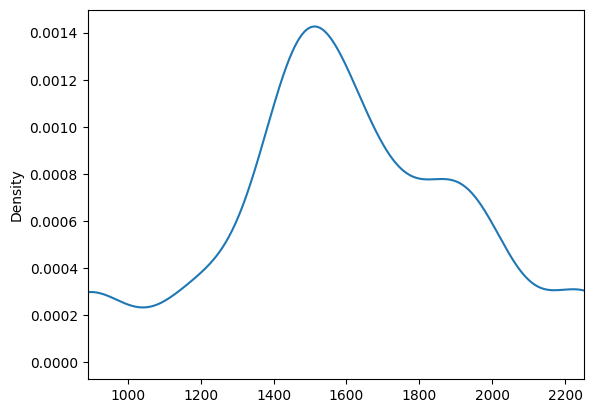

In [408]:
df.loc[df["Профессия"]=="Уборщик",'Объем производства'].plot(kind='kde', xlim=[890,df.loc[df["Профессия"]=="Уборщик",'Объем производства'].max()])

Линейный график распространения частоты величин доходов за год у Уборщиков

<Axes: ylabel='Density'>

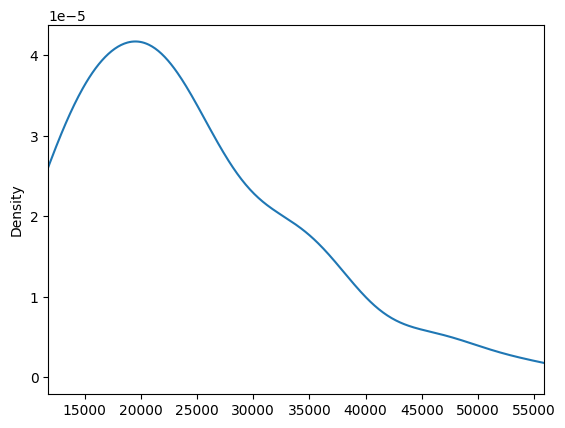

In [409]:
df.loc[df["Профессия"]=="Уборщик",'Доход (руб.)'].plot(kind='kde', xlim=[df.loc[(df["Профессия"]=="Уборщик") & (df["Объем производства"]>890),'Доход (руб.)'].min(),df.loc[df["Профессия"]=="Уборщик",'Доход (руб.)'].max()])

<Axes: ylabel='Frequency'>

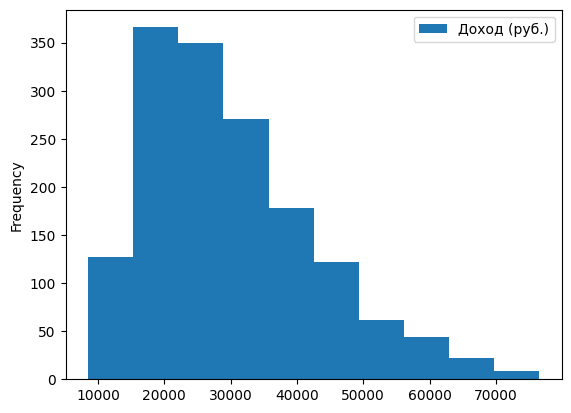

In [410]:
df.plot(kind='hist',x="Отработанные часы", y='Доход (руб.)')

<Axes: ylabel='Frequency'>

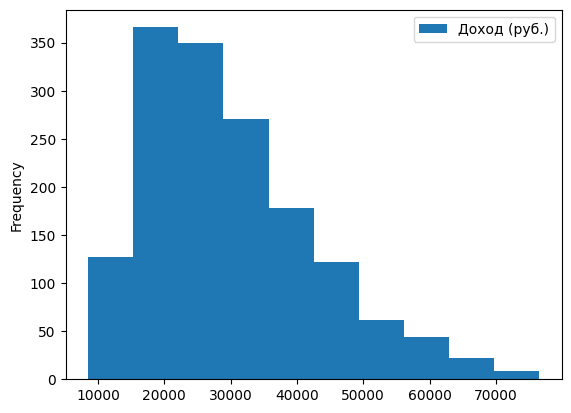

In [411]:
df.plot(kind='hist',x="Объем производства", y='Доход (руб.)')

In [412]:
profit=df.groupby(["Профессия", ])["Доход (руб.)"].min().reset_index()
profit

,Профессия,Доход (руб.)
0,Вальцовщик,13106.76
1,Контролер качества готовой продукции,12955.24
2,Нагревальщик металла,11972.42
3,Огнеупорщик,11056.76
4,Оператор поста управления,9296.66
5,Подручный вальцовщика,11126.02
6,Посадчик металла,12640.76
7,Резчик горячего металла,11776.76
8,Уборщик,8534.02


Посмотрим на объем производства по Уборщику


In [413]:
Cleaner = df[df["Доход (руб.)"]==profit.iloc[8]["Доход (руб.)"]]
Cleaner = Cleaner[Cleaner['Профессия']=='Уборщик']
Cleaner

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1816,1817,Григорьев А. Т.,Уборщик,3,Вспомогательные помещения,1.0,2022-10,96,890,8534.02,0,951.23
1817,1818,Клюев Д. М.,Уборщик,3,Вспомогательные помещения,1.0,2022-10,96,890,8534.02,0,951.23
1821,1822,Чернышев Д. В.,Уборщик,3,Вспомогательные помещения,1.0,2022-10,96,890,8534.02,0,951.23


Вывод:  при одинаковом отработанном времени,  объемы производста одинаковый!

Проверим гипотезу о ненужности признака Объем производства на примере других пофессий  

In [414]:
Roller = df[df["Доход (руб.)"]==profit.iloc[0]["Доход (руб.)"]]
Roller = Roller[Roller['Профессия']=='Вальцовщик']
Roller

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1893,1894,Винокуров М. Т.,Вальцовщик,5,Калибровочный стан,3.3,2022-10,96,890,13106.76,2592,3179.57
1906,1907,Третьяков В. А.,Вальцовщик,5,Калибровочный стан,3.3,2022-10,96,890,13106.76,2592,3179.57
1934,1935,Белоусов М. Д.,Вальцовщик,5,Пилигримовые станы,3.3,2022-10,96,890,13106.76,2592,3179.57
1939,1940,Козлов А. А.,Вальцовщик,5,Прошивной стан,3.3,2022-10,96,890,13106.76,2592,3179.57
1940,1941,Кукушкин Л. Л.,Вальцовщик,5,Прошивной стан,3.3,2022-10,96,890,13106.76,2592,3179.57


In [415]:
Quality_Controller = df[df["Доход (руб.)"]==profit.iloc[1]["Доход (руб.)"]]
Quality_Controller = Quality_Controller[Quality_Controller['Профессия']=='Контролер качества готовой продукции']
Quality_Controller

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1953,1954,Белкин Г. В.,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,1.0,2022-10,96,890,12955.24,0,5925.1


In [416]:
Metal_Heater = df[df["Доход (руб.)"]==profit.iloc[2]["Доход (руб.)"]]
Metal_Heater = Metal_Heater[Metal_Heater['Профессия']=='Нагревальщик металла']
Metal_Heater

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1925,1926,Высоцкий М. А.,Нагревальщик металла,5,"Нагревательные печи, нагрев",3.4,2022-10,84,890,11972.42,2268,3179.57


In [417]:
Refractory = df[df["Доход (руб.)"]==profit.iloc[3]["Доход (руб.)"]]
Refractory = Refractory[Refractory['Профессия']=='Огнеупорщик']
Refractory

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1851,1852,Иванов П. А.,Огнеупорщик,4,Нагревательные печи,3.1,2022-10,96,890,11056.76,2592,2007.31


In [418]:
Handyman_Roller = df[df["Доход (руб.)"]==profit.iloc[5]["Доход (руб.)"]]
Handyman_Roller = Handyman_Roller[Handyman_Roller['Профессия']=='Подручный вальцовщика']
Handyman_Roller

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1824,1825,Быков Л. Н.,Подручный вальцовщика,3,Пилигримовые станы,3.3,2022-10,96,890,11126.02,2592,951.23
1825,1826,Воробьев А. О.,Подручный вальцовщика,3,Пилигримовые станы,3.3,2022-10,96,890,11126.02,2592,951.23


In [419]:
Metal_Loader = df[df["Доход (руб.)"]==profit.iloc[6]["Доход (руб.)"]]
Metal_Loader = Metal_Loader[Metal_Loader['Профессия']=='Посадчик металла']
Metal_Loader

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1864,1865,Смирнов Л. К.,Посадчик металла,4,Нагревательные печи,3.4,2022-10,96,890,12640.76,2592,2007.31


In [420]:
Hot_Metal_Cutter = df[df["Доход (руб.)"]==profit.iloc[7]["Доход (руб.)"]]
Hot_Metal_Cutter = Hot_Metal_Cutter[Hot_Metal_Cutter['Профессия']=='Резчик горячего металла']
Hot_Metal_Cutter

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1868,1869,Белов Г. М.,Резчик горячего металла,4,Пилигримовые станы,3.2,2022-10,96,890,11776.76,2592,2007.31
1871,1872,Демидов М. Д.,Резчик горячего металла,4,Пилигримовые станы,3.2,2022-10,96,890,11776.76,2592,2007.31
1875,1876,Левин В. Д.,Резчик горячего металла,4,Пилигримовые станы,3.2,2022-10,96,890,11776.76,2592,2007.31


In [421]:
df_v=df[df['Профессия']=='Вальцовщик']
df_v.groupby(['Профессия', 'Отработанные часы', 'Объем производства'])["Доход (руб.)"].min().reset_index()

,Профессия,Отработанные часы,Объем производства,Доход (руб.)
0,Вальцовщик,96,890,13106.76
1,Вальцовщик,108,890,14745.11
2,Вальцовщик,108,1200,NaN
3,Вальцовщик,120,890,16383.45
4,Вальцовщик,120,1200,19434.05
...,...,...,...,...
86,Вальцовщик,288,2250,60349.81
87,Вальцовщик,300,1950,NaN
88,Вальцовщик,300,2250,63631.09
89,Вальцовщик,312,2250,NaN


In [422]:
df_q=df[df['Профессия']=='Контролер качества готовой продукции']
df_q.groupby(['Профессия', 'Отработанные часы', 'Объем производства'])["Доход (руб.)"].min().reset_index()

,Профессия,Отработанные часы,Объем производства,Доход (руб.)
0,Контролер качества готовой продукции,96,890,12955.24
1,Контролер качества готовой продукции,108,890,14574.64
2,Контролер качества готовой продукции,108,1200,14574.64
3,Контролер качества готовой продукции,120,890,16194.05
4,Контролер качества готовой продукции,132,890,17813.45
5,Контролер качества готовой продукции,132,1200,17813.45
6,Контролер качества готовой продукции,144,1200,19432.86
7,Контролер качества готовой продукции,144,1460,NaN
8,Контролер качества готовой продукции,144,1490,NaN
9,Контролер качества готовой продукции,156,1430,21052.26


In [423]:
df_m_h=df[df['Профессия']=='Нагревальщик металла']
df_m_h.groupby(['Профессия', 'Отработанные часы', 'Объем производства'])["Доход (руб.)"].min().reset_index().head(52)

,Профессия,Отработанные часы,Объем производства,Доход (руб.)
0,Нагревальщик металла,84,890,11972.42
1,Нагревальщик металла,96,890,12640.76
2,Нагревальщик металла,108,890,14220.85
3,Нагревальщик металла,108,1200,NaN
4,Нагревальщик металла,120,890,15800.95
5,Нагревальщик металла,120,1200,17103.45
6,Нагревальщик металла,132,890,18813.80
7,Нагревальщик металла,132,1200,17381.04
8,Нагревальщик металла,132,1430,18813.80
9,Нагревальщик металла,144,1200,18961.14


In [424]:
df_m_h=df[df['Профессия']=='Нагревальщик металла']
df_m_h.groupby(['Профессия', 'Отработанные часы', 'Объем производства'])["Доход (руб.)"].min().reset_index().tail(50)

,Профессия,Отработанные часы,Объем производства,Доход (руб.)
52,Нагревальщик металла,204,1640,NaN
53,Нагревальщик металла,204,1790,32359.76
54,Нагревальщик металла,204,1930,32881.40
55,Нагревальщик металла,204,1950,33011.27
56,Нагревальщик металла,204,2250,NaN
57,Нагревальщик металла,216,1200,42754.91
58,Нагревальщик металла,216,1460,NaN
59,Нагревальщик металла,216,1490,NaN
60,Нагревальщик металла,216,1500,36043.60
61,Нагревальщик металла,216,1620,NaN


In [425]:
df_r=df[df['Профессия']=='Огнеупорщик']
df_r.groupby(['Профессия', 'Отработанные часы', 'Объем производства'])["Доход (руб.)"].min().reset_index().tail(50)

,Профессия,Отработанные часы,Объем производства,Доход (руб.)
0,Огнеупорщик,96,890,11056.76
1,Огнеупорщик,108,890,12438.85
2,Огнеупорщик,132,890,15203.04
3,Огнеупорщик,132,1490,NaN
4,Огнеупорщик,144,1200,16585.14
5,Огнеупорщик,144,1460,16889.62
6,Огнеупорщик,156,1200,17967.23
7,Огнеупорщик,156,1430,17967.23
8,Огнеупорщик,168,1200,19349.33
9,Огнеупорщик,168,1430,19349.33


<Axes: xlabel='Объем производства'>

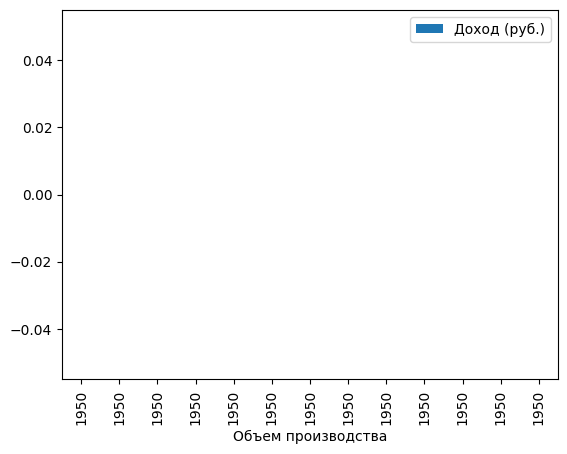

In [426]:
#Гистограмма Доход/Объём производства
df.loc[:12,:].plot.bar(x="Объем производства", y="Доход (руб.)")

Вывод: также как и на вредном производстве при одинаковом отработанном времени но разных объемах производста доход одинаковый. График интерактивный, при нажатии в легенда не профессию можно включать или отключать изображение данных

In [427]:
fig = px.scatter(df, x='Объем производства', y='Доход (руб.)', color='Профессия')
fig.show()

Посмотрим на график Объем производства в зависимости от времени (по профессиям)

In [428]:
fig = px.scatter(df, y='Объем производства', x='Месяц', color='Профессия')
fig.show()

Вывод: Поразительный график!!! Данные всех профессий совпадают! На основании двух последних графиков я прихожу к мнению что данные Объем производства могу не учитываться при расчете Дохода сотрудников

In [429]:
df.groupby(["Профессия"])["Объем производства"].describe()

,count,mean,std,min,25%,50%,75%,max
Профессия,,,,,,,,
Вальцовщик,612.0,1595.833333,345.063563,890.0,1452.5,1560.0,1825.0,2250.0
Контролер качества готовой продукции,108.0,1595.833333,346.388915,890.0,1452.5,1560.0,1825.0,2250.0
Нагревальщик металла,504.0,1595.833333,345.124088,890.0,1452.5,1560.0,1825.0,2250.0
Огнеупорщик,60.0,1595.833333,347.691133,890.0,1452.5,1560.0,1825.0,2250.0
Оператор поста управления,324.0,1595.833333,345.314838,890.0,1452.5,1560.0,1825.0,2250.0
Подручный вальцовщика,360.0,1595.833333,345.261396,890.0,1452.5,1560.0,1825.0,2250.0
Посадчик металла,96.0,1595.833333,346.591422,890.0,1452.5,1560.0,1825.0,2250.0
Резчик горячего металла,84.0,1595.833333,346.852312,890.0,1452.5,1560.0,1825.0,2250.0
Уборщик,252.0,1595.833333,345.467666,890.0,1452.5,1560.0,1825.0,2250.0


#Рассмотрим признак Оборудование

In [430]:
#Уникальные записи для каждой из профессий
equipment=df.groupby(["Профессия"])["Оборудование"].unique().reset_index()
equipment

,Профессия,Оборудование
0,Вальцовщик,"[Калибровочный стан, Пилигримовые станы, Проши..."
1,Контролер качества готовой продукции,[Контрольно-измерительная аппаратура]
2,Нагревальщик металла,"[Нагревательные печи, Нагревательные печи, кан..."
3,Огнеупорщик,[Нагревательные печи]
4,Оператор поста управления,"[Калибровочный стан, Калибровочный стан, ГРП]"
5,Подручный вальцовщика,"[Пилигримовые станы, Прошивной стан]"
6,Посадчик металла,[Нагревательные печи]
7,Резчик горячего металла,[Пилигримовые станы]
8,Уборщик,"[Вспомогательные помещения, Пилигримовые станы]"


Проверка на надбавку для Уборщиков за нахождение на оборудовании

In [431]:
#Пилигримовые станы по сравнению с Вспомогательные помещениями составляет 3-е значение:
pil=df.loc[(df["Профессия"]=="Уборщик")&(df["Оборудование"]=="Пилигримовые станы"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Уборщик")&(df["Оборудование"]=="Пилигримовые станы"),"Разряд"].min()
vspom=df.loc[(df["Профессия"]=="Уборщик")&(df["Оборудование"]=="Вспомогательные помещения"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Уборщик")&(df["Оборудование"]=="Вспомогательные помещения"),"Разряд"].min()
ind8=pil,vspom,pil[0]-vspom[0]
ind8

((11126.02, 2), (8534.02, 2), 2592.0)

Вывод: Начисление идёт засчёт Вредности, следовательно оборудование не учитываем

Проверка на надбавку для Подручных вальцовщика за нахождение на оборудовании

In [432]:
#Прошивной стан по сравнению с Пилигримовые станы составляет 3-е значение:
prosh=df.loc[(df["Профессия"]=="Подручный вальцовщика")&(df["Оборудование"]=="Прошивной стан"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Подручный вальцовщика")&(df["Оборудование"]=="Прошивной стан"),"Разряд"].min()
piligrim2=df.loc[(df["Профессия"]=="Подручный вальцовщика")&(df["Оборудование"]=="Пилигримовые станы"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Подручный вальцовщика")&(df["Оборудование"]=="Пилигримовые станы"),"Разряд"].min()
ind5=prosh,piligrim2,prosh[0]-piligrim2[0]
ind5

((12064.76, 4), (11126.02, 2), 938.7399999999998)

Вывод: Начисление идёт засчёт Вредности, следовательно оборудование не учитываем

Проверка на надбавку для Оператора поста управления за нахождение на оборудовании

In [433]:
#Калибровочный стан по сравнению с Калибровочный стан, ГРП составляет 3-е значение:
calibrStan1=df.loc[(df["Профессия"]=="Оператор поста управления")&(df["Оборудование"]=="Калибровочный стан"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Оператор поста управления")&(df["Оборудование"]=="Калибровочный стан"),"Разряд"].min()
combo1=df.loc[(df["Профессия"]=="Оператор поста управления")&(df["Оборудование"]=="Калибровочный стан, ГРП"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Оператор поста управления")&(df["Оборудование"]=="Калибровочный стан, ГРП"),"Разряд"].min()
ind4=calibrStan1,combo1,combo1[0]-calibrStan1[0],
ind4

((9296.66, 4), (11666.76, 5), 2370.1000000000004)

Вывод: Начисление идёт засчёт Вредности, следовательно оборудование не учитываем

Проверка на надбавку для Нагревальщик металла за нахождение на оборудовании

In [434]:
#Нагревательные печи по сравнению с Нагревательные печи, кантовка и Нагревательные печи, нагрев составляет 4-е и 5-е значения:
nagr1=df.loc[(df["Профессия"]=="Нагревальщик металла")&(df["Оборудование"]=="Нагревательные печи"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Нагревальщик металла")&(df["Оборудование"]=="Нагревательные печи"),"Разряд"].min()
combo2=df.loc[(df["Профессия"]=="Нагревальщик металла")&(df["Оборудование"]=="Нагревательные печи, кантовка"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Нагревальщик металла")&(df["Оборудование"]=="Нагревательные печи, кантовка"),"Разряд"].min()
combo3=df.loc[(df["Профессия"]=="Нагревальщик металла")&(df["Оборудование"]=="Нагревательные печи, нагрев"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Нагревальщик металла")&(df["Оборудование"]=="Нагревательные печи, нагрев"),"Разряд"].min()
ind3=nagr1,combo2,combo3,combo2[0]-nagr1[0],combo3[0]-nagr1[0]
ind3

((12640.76, 4), (13682.76, 5), (11972.42, 5), 1042.0, -668.3400000000001)

Вывод: Начисление идёт засчёт Вредности, следовательно оборудование не учитываем

Проверку на надбавку для Вальцовщика за нахождение на оборудовании

In [435]:
# Пилигримовые станы  по сравнению с Калибровочный стан и  Прошивной стан составляет 4-е и 5-е значения:
piligrim3=df.loc[(df["Профессия"]=="Вальцовщик")&(df["Оборудование"]=="Пилигримовые станы"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Вальцовщик")&(df["Оборудование"]=="Пилигримовые станы"),"Разряд"].min()
calibrStan2=df.loc[(df["Профессия"]=="Вальцовщик")&(df["Оборудование"]=="Калибровочный стан"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Вальцовщик")&(df["Оборудование"]=="Калибровочный стан"),"Разряд"].min()
prosh2=df.loc[(df["Профессия"]=="Вальцовщик")&(df["Оборудование"]=="Прошивной стан"),"Доход (руб.)"].min(),df.loc[(df["Профессия"]=="Вальцовщик")&(df["Оборудование"]=="Прошивной стан"),"Разряд"].min()
ind0=piligrim3,calibrStan2,prosh2,piligrim3[0]-calibrStan2[0],prosh2[0]-calibrStan2[0]
ind0

((13106.76, 5), (13106.76, 5), (13106.76, 5), 0.0, 0.0)

Вывод: Начисление идёт засчёт Вредности, следовательно оборудование не учитываем

Обощенный вывод: повышение заработка не заивисит от оборудования

In [436]:
profit=df.groupby(['Профессия'])[['Доход (руб.)', 'Отработанные часы']].min().reset_index()
profit

,Профессия,Доход (руб.),Отработанные часы
0,Вальцовщик,13106.76,96
1,Контролер качества готовой продукции,12955.24,96
2,Нагревальщик металла,11972.42,84
3,Огнеупорщик,11056.76,96
4,Оператор поста управления,9296.66,84
5,Подручный вальцовщика,11126.02,96
6,Посадчик металла,12640.76,96
7,Резчик горячего металла,11776.76,96
8,Уборщик,8534.02,72


In [437]:
df.groupby(['Профессия', 'Класс вредности'])[['Доход (руб.)', 'Отработанные часы']].min().reset_index()

,Профессия,Класс вредности,Доход (руб.),Отработанные часы
0,Вальцовщик,3.3,13106.76,96
1,Контролер качества готовой продукции,1.0,12955.24,96
2,Нагревальщик металла,3.4,11972.42,84
3,Огнеупорщик,3.1,11056.76,96
4,Оператор поста управления,2.0,9296.66,84
5,Подручный вальцовщика,3.3,11126.02,96
6,Посадчик металла,3.4,12640.76,96
7,Резчик горячего металла,3.2,11776.76,96
8,Уборщик,1.0,8534.02,84
9,Уборщик,3.3,11126.02,72


In [438]:
k=df.loc[(df["Профессия"]=="Нагревальщик металла")&(df["Разряд"]==5),"FIO"].unique()
df[df["FIO"]==k[0]]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
115,116,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-01,216,1950,NaN,5832,3179.57
315,316,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-02,180,1460,NaN,4860,3179.57
515,516,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-03,168,1430,NaN,4536,3179.57
715,716,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-04,240,1790,NaN,6480,3179.57
915,916,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-05,192,1490,NaN,5184,3179.57
1115,1116,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-06,300,2250,NaN,8100,3179.57
1315,1316,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-07,192,1620,NaN,5184,3179.57
1515,1516,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-08,252,1930,NaN,6804,3179.57
1715,1716,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-09,216,1640,NaN,5832,3179.57
1915,1916,Сорокин М. Д.,Нагревальщик металла,5,Нагревательные печи,3.4,2022-10,96,890,NaN,2592,3179.57


In [439]:
j=sorted(df["Объем производства"].unique()) #посмотрим какие данные присутствуют в признаке Объем производства
j

[890, 1200, 1430, 1460, 1490, 1500, 1620, 1640, 1790, 1930, 1950, 2250]

In [440]:
df[(df['Доход (руб.)']==15547.24)  & (df['Профессия']=='Вальцовщик')]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1967,1968,Гришин А. А.,Вальцовщик,7,Пилигримовые станы,3.3,2022-10,96,890,15547.24,2592,5925.1
1973,1974,Титов Т. П.,Вальцовщик,7,Пилигримовые станы,3.3,2022-10,96,890,15547.24,2592,5925.1


In [441]:
df.groupby(["Профессия","Разряд", 'Месяц'])["Доход (руб.)"].min().reset_index()

,Профессия,Разряд,Месяц,Доход (руб.)
0,Вальцовщик,5,2022-01,31555.70
1,Вальцовщик,5,2022-02,19998.12
2,Вальцовщик,5,2022-03,18021.80
3,Вальцовщик,5,2022-04,30875.07
4,Вальцовщик,5,2022-05,19660.14
...,...,...,...,...
247,Уборщик,3,2022-08,23558.02
248,Уборщик,3,2022-09,NaN
249,Уборщик,3,2022-10,8534.02
250,Уборщик,3,2022-11,11734.27


In [442]:
df[(df['Профессия']=='Уборщик') & (df['Разряд']) & (df['Отработанные часы']==240) &
   (df['Класс вредности']<3) & (df['Объем производства']==1950)]['Доход (руб.)'].fillna(method='bfill')

17    30488.47
19    30488.47
20    30488.47
Name: Доход (руб.), dtype: float64

In [443]:
df[(df['Профессия']=='Уборщик') & (df['Разряд']) & (df['Отработанные часы']==240) &
   (df['Класс вредности']<3) & (df['Объем производства']==1950)]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
17,18,Клюев Д. М.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,240,1950,30488.47,0,951.23
19,20,Львов А. С.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,240,1950,NaN,0,951.23
20,21,Наумов О. В.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,240,1950,30488.47,0,951.23


# Заполнение отсутствующих значений по существующим данным (Доделать)


In [444]:
duplicateRows = df[df.duplicated(['Профессия', 'Разряд', 'Класс вредности', 'Отработанные часы', 'Объем производства'])]
duplicateRows

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
7,8,Комаров А. И.,Уборщик,2,Пилигримовые станы,3.3,2022-01,240,1950,NaN,6480,0.00
9,10,Лазарев И. А.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01,240,1950,NaN,6480,0.00
19,20,Львов А. С.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,240,1950,NaN,0,951.23
20,21,Наумов О. В.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,240,1950,30488.47,0,951.23
21,22,Чернышев Д. В.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,228,1950,28217.32,0,951.23
...,...,...,...,...,...,...,...,...,...,...,...,...
2393,2394,Окулов Л. Н.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12,168,1500,NaN,4536,7528.18
2395,2396,Румянцев М. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12,180,1500,NaN,4860,7528.18
2396,2397,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,180,1500,NaN,4860,7528.18
2398,2399,Волков А. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,192,1500,NaN,5184,7528.18


Оставим столбцы с уникальными данными которые влияют на Доход

In [445]:
df_re=df[['Профессия', 'Разряд', 'Класс вредности', 'Отработанные часы', 'Объем производства', 'Доход (руб.)']]
df_re

,Профессия,Разряд,Класс вредности,Отработанные часы,Объем производства,Доход (руб.)
0,Уборщик,2,1.0,180,1950,NaN
1,Уборщик,2,1.0,228,1950,NaN
2,Уборщик,2,1.0,252,1950,NaN
3,Уборщик,2,3.3,240,1950,NaN
4,Подручный вальцовщика,2,3.3,252,1950,NaN
...,...,...,...,...,...,...
2395,Вальцовщик,8,3.3,180,1500,NaN
2396,Вальцовщик,8,3.3,180,1500,NaN
2397,Вальцовщик,8,3.3,156,1500,NaN
2398,Вальцовщик,8,3.3,192,1500,NaN


Оставим данные где указан Доход

In [446]:
df_re_n=df_re[df_re['Доход (руб.)']>0]
df_re_n

,Профессия,Разряд,Класс вредности,Отработанные часы,Объем производства,Доход (руб.)
16,Уборщик,3,1.0,228,1950,28217.32
17,Уборщик,3,1.0,240,1950,30488.47
18,Уборщик,3,1.0,216,1950,25946.17
20,Уборщик,3,1.0,240,1950,30488.47
21,Уборщик,3,1.0,228,1950,28217.32
...,...,...,...,...,...,...
2376,Вальцовщик,7,3.3,180,1500,30770.48
2377,Вальцовщик,7,3.3,204,1500,37896.10
2378,Вальцовщик,7,3.3,180,1500,30770.48
2380,Вальцовщик,7,3.3,192,1500,34333.29


Посмотрим на дублирующиеся строки

In [447]:
duplicateRows = df_re_n[df_re_n.duplicated ()]
duplicateRows

,Профессия,Разряд,Класс вредности,Отработанные часы,Объем производства,Доход (руб.)
20,Уборщик,3,1.0,240,1950,30488.47
21,Уборщик,3,1.0,228,1950,28217.32
29,Уборщик,3,3.3,240,1950,36968.47
33,Подручный вальцовщика,3,3.3,264,1950,42158.77
34,Подручный вальцовщика,3,3.3,264,1950,42158.77
...,...,...,...,...,...,...
2374,Вальцовщик,7,3.3,168,1500,27207.67
2375,Вальцовщик,7,3.3,156,1500,25264.26
2376,Вальцовщик,7,3.3,180,1500,30770.48
2378,Вальцовщик,7,3.3,180,1500,30770.48


Удалим дубликаты и посмотрим количество уникальных записей по некоторым признакам

In [448]:
df_re_n=df_re_n.drop_duplicates()
df_re_n

,Профессия,Разряд,Класс вредности,Отработанные часы,Объем производства,Доход (руб.)
16,Уборщик,3,1.0,228,1950,28217.32
17,Уборщик,3,1.0,240,1950,30488.47
18,Уборщик,3,1.0,216,1950,25946.17
22,Уборщик,3,3.3,228,1950,34373.32
23,Уборщик,3,3.3,240,1950,36968.47
...,...,...,...,...,...,...
2367,Вальцовщик,7,3.3,168,1500,27207.67
2369,Вальцовщик,7,3.3,144,1500,23320.86
2373,Вальцовщик,7,3.3,180,1500,30770.48
2377,Вальцовщик,7,3.3,204,1500,37896.10


In [449]:
df1=df
df2=df_re_n
df2=df2.reset_index()
df2=df2.drop(['index'], axis=1)
df2


,Профессия,Разряд,Класс вредности,Отработанные часы,Объем производства,Доход (руб.)
0,Уборщик,3,1.0,228,1950,28217.32
1,Уборщик,3,1.0,240,1950,30488.47
2,Уборщик,3,1.0,216,1950,25946.17
3,Уборщик,3,3.3,228,1950,34373.32
4,Уборщик,3,3.3,240,1950,36968.47
...,...,...,...,...,...,...
796,Вальцовщик,7,3.3,168,1500,27207.67
797,Вальцовщик,7,3.3,144,1500,23320.86
798,Вальцовщик,7,3.3,180,1500,30770.48
799,Вальцовщик,7,3.3,204,1500,37896.10


In [450]:
df.groupby(['Профессия', 'Разряд', 'Класс вредности', 'Отработанные часы',  'Объем производства','Доход (руб.)'])['Доход (руб.)'].groups

{('Вальцовщик', 5, 3.3, 96, 890, 13106.76): [1893, 1906, 1934, 1939, 1940], ('Вальцовщик', 5, 3.3, 108, 890, 14745.11): [1891, 1898, 1901, 1903, 1905, 1908, 1935, 1937, 1938, 1941], ('Вальцовщик', 5, 3.3, 108, 890, nan): [1899], ('Вальцовщик', 5, 3.3, 120, 890, 16383.45): [1904, 1936, 1942], ('Вальцовщик', 5, 3.3, 132, 1200, 18021.8): [2091, 2098, 2105, 2137, 2138, 2139, 2141], ('Вальцовщик', 5, 3.3, 132, 1430, 18021.8): [501, 506, 541], ('Вальцовщик', 5, 3.3, 144, 1200, 19660.14): [2104, 2106, 2135, 2136, 2142], ('Вальцовщик', 5, 3.3, 144, 1430, 19660.14): [498], ('Вальцовщик', 5, 3.3, 144, 1460, 19998.12): [334], ('Вальцовщик', 5, 3.3, 144, 1490, 19660.14): [893, 898], ('Вальцовщик', 5, 3.3, 156, 1200, 21298.49): [2093, 2101, 2108, 2134, 2140], ('Вальцовщик', 5, 3.3, 156, 1200, nan): [2099], ('Вальцовщик', 5, 3.3, 156, 1430, 21298.49): [491, 538, 539], ('Вальцовщик', 5, 3.3, 156, 1460, 21664.63): [298, 304, 306, 336], ('Вальцовщик', 5, 3.3, 156, 1490, 21298.49): [908, 935], ('Вальцов

In [451]:
df.reset_index(drop= True ).equals(df_re_n. reset_index(drop= True ))

False

In [452]:
df.groupby(['Профессия','Разряд', 'Отработанные часы',  'Объем производства',])['Доход (руб.)'].min().head(50)

Профессия   Разряд  Отработанные часы  Объем производства
Вальцовщик  5       96                 890                   13106.76
                    108                890                   14745.11
                    120                890                   16383.45
                    132                1200                  18021.80
                                       1430                  18021.80
                    144                1200                  19660.14
                                       1430                  19660.14
                                       1460                  19998.12
                                       1490                  19660.14
                    156                1200                  21298.49
                                       1430                  21298.49
                                       1460                  21664.63
                                       1490                  21298.49
                                

In [453]:
df.groupby(['Профессия']).get_group('Уборщик')

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,180,1950,NaN,0,0.00
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,228,1950,NaN,0,0.00
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,252,1950,NaN,0,0.00
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01,240,1950,NaN,6480,0.00
5,6,Воронов Р. И.,Уборщик,2,Пилигримовые станы,3.3,2022-01,264,1950,NaN,7128,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2222,2223,Абрамов Ф. М.,Уборщик,3,Пилигримовые станы,3.3,2022-12,156,1500,18079.78,4212,951.23
2223,2224,Александров А. М.,Уборщик,3,Пилигримовые станы,3.3,2022-12,180,1500,21928.03,4860,951.23
2228,2229,Потапов М. И.,Уборщик,3,Пилигримовые станы,3.3,2022-12,156,1500,18079.78,4212,951.23
2229,2230,Румянцев И. Д.,Уборщик,3,Пилигримовые станы,3.3,2022-12,192,1500,24385.54,5184,951.23


In [454]:
#cond = (df1['Профессия'] == df2['Профессия']) & (df1['Разряд'] == df2['Разряд']) & (df1['Класс вредности'] == df2['Класс вредности']) & (df1['Отработанные часы'] == df2['Отработанные часы']) & (df1['Объем производства'] == df2['Объем производства'])


In [455]:
#df1.loc[cond, 'Доход (руб.)'].reset_index(drop = True) == df2.loc[cond, 'Доход (руб.)'].reset_index(drop = True)
#df1

In [456]:
df_v.groupby(['FIO','Профессия', 'Разряд'])[['Доход (руб.)', 'Отработанные часы']].min()

,,,Доход (руб.),Отработанные часы
FIO,Профессия,Разряд,,
Агафонов С. И.,Вальцовщик,6,14263.39,96
Андреев Е. А.,Вальцовщик,5,14745.11,108
Белкин В. И.,Вальцовщик,7,19434.05,120
Белоусов М. Д.,Вальцовщик,5,13106.76,96
Богданов А. Т.,Вальцовщик,7,17490.64,108
Верещагин Я. А.,Вальцовщик,8,NaN,96
Винокуров М. Т.,Вальцовщик,5,13106.76,96
Власов С. Д.,Вальцовщик,8,NaN,96
Волков А. А.,Вальцовщик,8,NaN,120


In [457]:
df[(df['FIO']=='Петров А. Е.') &	(df['Профессия']=='Вальцовщик')	& (df['Разряд']==8) & (df['Отработанные часы']==96)]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1994,1995,Петров А. Е.,Вальцовщик,8,Пилигримовые станы,3.3,2022-10,96,890,NaN,2592,7528.18


In [458]:
df['Доход (руб.)'][1994]=15547.24+D_8
df[(df['FIO']=='Петров А. Е.') &	(df['Профессия']=='Вальцовщик')	& (df['Разряд']==8) & (df['Отработанные часы']==96)]

<ipython-input-458-3ad001a37472>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
1994,1995,Петров А. Е.,Вальцовщик,8,Пилигримовые станы,3.3,2022-10,96,890,17150.32,2592,7528.18


In [459]:
df_v=df[(df['Профессия']=='Вальцовщик') & (df['Разряд']==8)]
df_v.groupby(['FIO','Профессия', 'Разряд'])[['Доход (руб.)', 'Отработанные часы']].min().head(90)

,,,Доход (руб.),Отработанные часы
FIO,Профессия,Разряд,,
Верещагин Я. А.,Вальцовщик,8,NaN,96
Власов С. Д.,Вальцовщик,8,NaN,96
Волков А. А.,Вальцовщик,8,NaN,120
Крылов С. Е.,Вальцовщик,8,NaN,108
Лебедев Л. Е.,Вальцовщик,8,NaN,108
Лукьянов А. А.,Вальцовщик,8,NaN,96
Новиков А. Ф.,Вальцовщик,8,NaN,108
Окулов Л. Н.,Вальцовщик,8,NaN,120
Петров А. Е.,Вальцовщик,8,17150.32,96


In [460]:
for i in range(len(df)):
  if df['Профессия'][i]=='Вальцовщик':

      if df['Разряд'][i]==8:

          if df['Отработанные часы'][i]==96:
            df['Доход (руб.)'][i]=15547.24+D_8
df_v=df[(df['Профессия']=='Вальцовщик') & (df['Разряд']==8)]
df_v.groupby(['FIO','Профессия', 'Разряд'])[['Доход (руб.)', 'Отработанные часы']].min().head()

<ipython-input-460-ad6fd3b93fdc>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,,Доход (руб.),Отработанные часы
FIO,Профессия,Разряд,,
Верещагин Я. А.,Вальцовщик,8,17150.32,96
Власов С. Д.,Вальцовщик,8,17150.32,96
Волков А. А.,Вальцовщик,8,NaN,120
Крылов С. Е.,Вальцовщик,8,NaN,108
Лебедев Л. Е.,Вальцовщик,8,NaN,108


In [461]:
df.groupby(['Профессия', 'Разряд'])[['Доход (руб.)', 'Отработанные часы']].min().reset_index()

,Профессия,Разряд,Доход (руб.),Отработанные часы
0,Вальцовщик,5,13106.76,96
1,Вальцовщик,6,14263.39,96
2,Вальцовщик,7,15547.24,96
3,Вальцовщик,8,17150.32,96
4,Контролер качества готовой продукции,7,12955.24,96
5,Контролер качества готовой продукции,8,NaN,108
6,Нагревальщик металла,4,12640.76,96
7,Нагревальщик металла,5,11972.42,84
8,Нагревальщик металла,6,16694.31,108
9,Нагревальщик металла,7,18138.64,96


Заполнение пустых значений 8 разряда при 96 РЧ

In [462]:
for i in range(len(df)):
  if df['Профессия'][i]=='Нагревальщик металла':

      if df['Разряд'][i]==8:

          if df['Отработанные часы'][i]==96:
            df['Доход (руб.)'][i]=15547.24+D_8
df_n=df[(df['Профессия']=='Нагревальщик металла') & (df['Разряд']==8)]
df_n.groupby(['FIO','Профессия', 'Разряд'])[['Доход (руб.)', 'Отработанные часы']].min().head(90)

<ipython-input-462-f4e69bb089b2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,,Доход (руб.),Отработанные часы
FIO,Профессия,Разряд,,
Козлов А. Н.,Нагревальщик металла,8,17150.32,96
Максимов Р. М.,Нагревальщик металла,8,17150.32,96
Пахомов Д. С.,Нагревальщик металла,8,NaN,120
Соколов С. С.,Нагревальщик металла,8,17150.32,96
Чернов С. Е.,Нагревальщик металла,8,17150.32,96
Шаповалов А. Р.,Нагревальщик металла,8,NaN,108


In [463]:
df.groupby(["Профессия", "Разряд"])["Доход (руб.)"].min().reset_index()

,Профессия,Разряд,Доход (руб.)
0,Вальцовщик,5,13106.76
1,Вальцовщик,6,14263.39
2,Вальцовщик,7,15547.24
3,Вальцовщик,8,17150.32
4,Контролер качества готовой продукции,7,12955.24
5,Контролер качества готовой продукции,8,NaN
6,Нагревальщик металла,4,12640.76
7,Нагревальщик металла,5,11972.42
8,Нагревальщик металла,6,16694.31
9,Нагревальщик металла,7,18138.64


In [464]:
profit=df.groupby(["Профессия", 'Разряд'])['Отработанные часы', "Доход (руб.)"].min().reset_index()
profit

<ipython-input-464-54cb83e62555>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Профессия,Разряд,Отработанные часы,Доход (руб.)
0,Вальцовщик,5,96,13106.76
1,Вальцовщик,6,96,14263.39
2,Вальцовщик,7,96,15547.24
3,Вальцовщик,8,96,17150.32
4,Контролер качества готовой продукции,7,96,12955.24
5,Контролер качества готовой продукции,8,108,NaN
6,Нагревальщик металла,4,96,12640.76
7,Нагревальщик металла,5,84,11972.42
8,Нагревальщик металла,6,108,16694.31
9,Нагревальщик металла,7,96,18138.64


Заполнение пустых значений 2 разряда при 96 РЧ

In [465]:
for i in range(len(df)):
  if df['Профессия'][i]=='Подручный вальцовщика':

      if df['Разряд'][i]==2:

          if df['Отработанные часы'][i]==96:
            df['Доход (руб.)'][i]= 11126.02-D_2
df_p=df[(df['Профессия']=='Подручный вальцовщика') & (df['Разряд']==2)]
df_p.groupby(['FIO','Профессия', 'Разряд'])[['Доход (руб.)', 'Отработанные часы']].min().head()

<ipython-input-465-01e8b3d2ff53>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,,Доход (руб.),Отработанные часы
FIO,Профессия,Разряд,,
Волков Д. М.,Подручный вальцовщика,2,NaN,120
Ермолаев Р. А.,Подручный вальцовщика,2,NaN,108
Лазарев И. А.,Подручный вальцовщика,2,10174.79,96
Муравьев В. Б.,Подручный вальцовщика,2,NaN,108
Прохоров М. Р.,Подручный вальцовщика,2,NaN,108


In [466]:
df_v=df[df['Профессия']=='Вальцовщик']
profit_v=df_v.groupby(["Профессия", 'Отработанные часы'])["Доход (руб.)"].min().reset_index()
profit_v

,Профессия,Отработанные часы,Доход (руб.)
0,Вальцовщик,96,13106.76
1,Вальцовщик,108,14745.11
2,Вальцовщик,120,16383.45
3,Вальцовщик,132,18021.80
4,Вальцовщик,144,19660.14
5,Вальцовщик,156,21298.49
6,Вальцовщик,168,22936.84
7,Вальцовщик,180,25889.53
8,Вальцовщик,192,28842.22
9,Вальцовщик,204,31794.91


In [467]:
V_V=[]
p=profit_v['Отработанные часы'].min()
for i in range(len(profit_v)):
  V_V.append(profit_v[profit_v["Отработанные часы"]==p]["Доход (руб.)"].min())
  p+=12
  #print(i, profit.iloc[i]["Отработанные часы"])
V_V

[13106.76,
 14745.11,
 16383.45,
 18021.8,
 19660.14,
 21298.49,
 22936.84,
 25889.53,
 28842.22,
 31794.91,
 34747.6,
 38264.19,
 41246.55,
 46989.05,
 50102.85,
 53216.66,
 56330.46,
 63631.09,
 nan,
 70193.65]

In [468]:
70193.65-63631.09

6562.559999999998

In [469]:
V_V_v=[]
q=96
t=108
for i in range(len(V_V)-1):
  v=round(((V_V[i+1])-(V_V[i])), 2)
  V_V_v.append(v)

  print(q,'_',t,'  ', v)
  q+=12
  t+=12
V_V_v

96 _ 108    1638.35
108 _ 120    1638.34
120 _ 132    1638.35
132 _ 144    1638.34
144 _ 156    1638.35
156 _ 168    1638.35
168 _ 180    2952.69
180 _ 192    2952.69
192 _ 204    2952.69
204 _ 216    2952.69
216 _ 228    3516.59
228 _ 240    2982.36
240 _ 252    5742.5
252 _ 264    3113.8
264 _ 276    3113.81
276 _ 288    3113.8
288 _ 300    7300.63
300 _ 312    nan
312 _ 324    nan


[1638.35,
 1638.34,
 1638.35,
 1638.34,
 1638.35,
 1638.35,
 2952.69,
 2952.69,
 2952.69,
 2952.69,
 3516.59,
 2982.36,
 5742.5,
 3113.8,
 3113.81,
 3113.8,
 7300.63,
 nan,
 nan]


Вывод: если специалист работает  
при 96 РЧ это базовый оклад
от 96 до 168 часов добавка 1638.35

от 180 до 216 часов добавка 2952.69

от 180 до 216 часов добавка 2952.69

228 часов добавка 3516.59

240 часов добавка 2982.36   СТОП! Надо посмотреть, воэможно это разные специалисты  


In [470]:
df_v.groupby(['FIO'])['Отработанные часы', "Доход (руб.)"].min().reset_index().value_counts()

<ipython-input-470-7ceaf8bda88f>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



FIO               Отработанные часы  Доход (руб.)
Агафонов С. И.    96                 14263.39        1
Синицын А. Е.     120                16383.45        1
Осипов П. В.      120                19434.05        1
Павлов И. И.      108                17490.64        1
Петров А. Е.      96                 17150.32        1
Поляков Д. А.     108                14745.11        1
Попов Е. Ю.       108                17490.64        1
Семенов Д. А.     120                19434.05        1
Серебряков А. А.  120                19434.05        1
Смирнов С. М.     120                19434.05        1
Морозов Г. А.     108                14745.11        1
Соловьев В. М.    120                16383.45        1
Соловьев И. М.    108                16046.31        1
Терентьев М. Д.   108                14745.11        1
Титов Т. П.       96                 15547.24        1
Третьяков В. А.   96                 13106.76        1
Фролов Д. А.      120                16383.45        1
Фролов С. Ф.   

In [471]:
df_u=df[df['Профессия']=='Уборщик']
df_u['Отработанные часы'].value_counts()

192    36
168    28
204    27
228    26
180    23
156    16
216    14
240    13
264    11
144    10
132     8
108     7
252     6
120     6
276     5
96      5
288     3
84      3
300     2
336     1
312     1
72      1
Name: Отработанные часы, dtype: int64

In [472]:
print("Минимальный  доход Вальцовщика при разряде: \n5-", v5min, '\n6-', v6min, '\n7-', v7min, '\n8-', v8min )
print('Разница между доходами разрядов 6 и 5, 7 и 6, 8 и 7:',round(v6min-v5min, 2), round(v7min-v6min, 2), round(v8min-v7min, 2))
print('Доплата за разряд:', round(abs(round(v6min-v5min, 2) - round(v7min-v6min, 2)),  2))

Минимальный  доход Вальцовщика при разряде: 
5- 14745.11 
6- 16046.31 
7- 17490.64 
8- nan
Разница между доходами разрядов 6 и 5, 7 и 6, 8 и 7: 1301.2 1444.33 nan
Доплата за разряд: 143.13


In [473]:
v6=df[(df["Профессия"]=="Вальцовщик" ) & (df["Разряд"]==6)]
v6min=v6["Доход (руб.)"].min()
v7=df[(df["Профессия"]=="Вальцовщик" ) & (df["Разряд"]==7)]
v7min=v7["Доход (руб.)"].min()
v8=df[(df["Профессия"]=="Вальцовщик" ) & (df["Разряд"]==8)]
v8min=v8["Доход (руб.)"].min()

По Методу k-ближайших соседей заполним наш датафрейм

In [474]:
# Переведем текстовые признаки в категорийные, и заменим год и месяцы на порядковый номер месяца
cleanup_nums = {"Профессия": {"Вальцовщик": 1, "Контролер качества готовой продукции": 2, "Нагревальщик металла": 3, "Огнеупорщик": 4,
                                  "Оператор поста управления": 5, "Подручный вальцовщика": 6, "Посадчик металла":7, "Резчик горячего металла":8, "Уборщик":9},
                "Месяц": {"2022-01": 1, "2022-02": 2, "2022-03": 3, "2022-04": 4,
                                  "2022-05": 5, "2022-06": 6, "2022-07": 7, "2022-08": 8, "2022-09": 9, "2022-10": 10, "2022-11": 11, "2022-12": 12}}

In [475]:
obj_df = df.replace(cleanup_nums)

In [476]:
obj_df.head()

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр
0,1,Журавлев Б. И.,9,2,Вспомогательные помещения,1.0,1,180,1950,NaN,0,0.0
1,2,Степанов А. М.,9,2,Вспомогательные помещения,1.0,1,228,1950,NaN,0,0.0
2,3,Федотов М. М.,9,2,Вспомогательные помещения,1.0,1,252,1950,NaN,0,0.0
3,4,Абрамов Е. Д.,9,2,Пилигримовые станы,3.3,1,240,1950,NaN,6480,0.0
4,5,Волков Д. М.,6,2,Пилигримовые станы,3.3,1,252,1950,NaN,6804,0.0


In [477]:
obj_df = obj_df.drop(columns=['FIO', 'Оборудование', 'Квр',	'Кр'])
obj_df.head()

,ID,Профессия,Разряд,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
0,1,9,2,1.0,1,180,1950,NaN
1,2,9,2,1.0,1,228,1950,NaN
2,3,9,2,1.0,1,252,1950,NaN
3,4,9,2,3.3,1,240,1950,NaN
4,5,6,2,3.3,1,252,1950,NaN


In [478]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2400 non-null   int64  
 1   Профессия           2400 non-null   int64  
 2   Разряд              2400 non-null   int16  
 3   Класс вредности     2400 non-null   float64
 4   Месяц               2400 non-null   int64  
 5   Отработанные часы   2400 non-null   int16  
 6   Объем производства  2400 non-null   int16  
 7   Доход (руб.)        1560 non-null   float64
dtypes: float64(2), int16(3), int64(3)
memory usage: 107.9 KB


In [479]:
nan = np.nan
X = obj_df
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1.0000000e+00, 9.0000000e+00, 2.0000000e+00, ..., 1.8000000e+02,
        1.9500000e+03, 2.7885445e+04],
       [2.0000000e+00, 9.0000000e+00, 2.0000000e+00, ..., 2.2800000e+02,
        1.9500000e+03, 2.9352895e+04],
       [3.0000000e+00, 9.0000000e+00, 2.0000000e+00, ..., 2.5200000e+02,
        1.9500000e+03, 3.0488470e+04],
       ...,
       [2.3980000e+03, 1.0000000e+00, 8.0000000e+00, ..., 1.5600000e+02,
        1.5000000e+03, 2.6235965e+04],
       [2.3990000e+03, 1.0000000e+00, 8.0000000e+00, ..., 1.9200000e+02,
        1.5000000e+03, 3.2551885e+04],
       [2.4000000e+03, 1.0000000e+00, 8.0000000e+00, ..., 1.9200000e+02,
        1.5000000e+03, 3.2551885e+04]])

In [480]:
df_new = pd.DataFrame(data=imputer.fit_transform(X))
cols = [1, 2, 3, 4, 5, 6]
df_new.drop (df_new.columns [cols], axis= 1 , inplace= True )
df_new = df_new.rename(columns= {0: 'ID',  7: 'Доход, изм',})
df_new.head()

,ID,"Доход, изм"
0,1.0,27885.445
1,2.0,29352.895
2,3.0,30488.470
3,4.0,30488.470
4,5.0,30488.470


In [481]:
df_new['Доход, изм']=round(df_new['Доход, изм'], 2)
df_new.head()

,ID,"Доход, изм"
0,1.0,27885.44
1,2.0,29352.90
2,3.0,30488.47
3,4.0,30488.47
4,5.0,30488.47


In [482]:
df3 = pd.merge(df, df_new)
df_new = df_new.rename(columns= {16: 'Доход исп.'})
df3.head()

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр,"Доход, изм"
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,180,1950,NaN,0,0.0,27885.44
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,228,1950,NaN,0,0.0,29352.90
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,252,1950,NaN,0,0.0,30488.47
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01,240,1950,NaN,6480,0.0,30488.47
4,5,Волков Д. М.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01,252,1950,NaN,6804,0.0,30488.47


In [508]:
df3.to_excel("/content/drive/MyDrive/data/output.xlsx")

#Добавим столбец Оклад

Оклад рассчитывается как минимальный Доход, (руб.) по профессии - (минус)  Кр (коэффициент разряда) - (минус) Кр (коэффициент вредности)

In [484]:
df.groupby(["Профессия", 'Разряд'])["Доход (руб.)"].min().reset_index()

,Профессия,Разряд,Доход (руб.)
0,Вальцовщик,5,13106.76
1,Вальцовщик,6,14263.39
2,Вальцовщик,7,15547.24
3,Вальцовщик,8,17150.32
4,Контролер качества готовой продукции,7,12955.24
5,Контролер качества готовой продукции,8,NaN
6,Нагревальщик металла,4,12640.76
7,Нагревальщик металла,5,11972.42
8,Нагревальщик металла,6,16694.31
9,Нагревальщик металла,7,18138.64


Так как у нас самый минимальный разряд это 2-й, приведем все профессии ко 2-му разряду, эти цифры и будут Окладами

Распечатаем информацию по разрядам, расчитанную выше


In [485]:
print('Рассчитанная разница  2 и 3 разрядом:     ', D_2)
print('─' * 50)
print('Реальная разница между 3 и 4 разрядом:    ', round(pv4min-pv3min, 2))
print('Рассчитанная разница между 3 и 4 разрядом:', D_2+k23_34)
print('─' * 50)
print('Реальная разница между 4 и 5 разрядом:    ', round(nm5min-nm4min, 2))
print('Рассчитанная разница 4 и 5 разрядом:      ', D_2+k23_34+k34_45)
print('─' * 50)
print('Реальная разница между 5 и 6 разрядом:    ', round(nm6min-nm5min, 2))
print('Рассчитанная разница 5 и 6 разрядом:      ', D_2+k23_34+k34_45+k45_56)
print('─' * 50)
print('Реальная разница 6 и 7 разрядом:          ', round(nm7min-nm6min, 2))
print('Рассчитанная разница  6 и 7 разрядом:     ', D_2+k23_34+k34_45+k45_56+k56_67)
print('─' * 50)
print('Рассчитанная разница  7 и 8 разрядом:     ', D_2+k23_34+k34_45+k45_56+k56_67+k67_78)

Рассчитанная разница  2 и 3 разрядом:      951.23
──────────────────────────────────────────────────
Реальная разница между 3 и 4 разрядом:     1056.08
Рассчитанная разница между 3 и 4 разрядом: 1056.08
──────────────────────────────────────────────────
Реальная разница между 4 и 5 разрядом:     1172.26
Рассчитанная разница 4 и 5 разрядом:       1172.26
──────────────────────────────────────────────────
Реальная разница между 5 и 6 разрядом:     1301.2
Рассчитанная разница 5 и 6 разрядом:       1301.2
──────────────────────────────────────────────────
Реальная разница 6 и 7 разрядом:           1444.33
Рассчитанная разница  6 и 7 разрядом:      1444.33
──────────────────────────────────────────────────
Рассчитанная разница  7 и 8 разрядом:      1603.08


In [486]:
df_v_5=df[(df["Профессия"]=='Вальцовщик') & (df["Разряд"]==5)]
print(df_v_5.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
df_v_5['Доход (руб.)'].min() - 1172.26 - 1056.08 - 951.23 - (df_v_5['Отработанные часы'].min()*27)

     Профессия  Разряд  Отработанные часы  Класс вредности  Доход (руб.)
0   Вальцовщик       5                 96              3.3      13106.76
1   Вальцовщик       5                108              3.3      14745.11
2   Вальцовщик       5                120              3.3      16383.45
3   Вальцовщик       5                132              3.3      18021.80
4   Вальцовщик       5                144              3.3      19660.14
5   Вальцовщик       5                156              3.3      21298.49
6   Вальцовщик       5                168              3.3      22936.84
7   Вальцовщик       5                180              3.3      25889.53
8   Вальцовщик       5                192              3.3      28842.22
9   Вальцовщик       5                204              3.3      31794.91
10  Вальцовщик       5                216              3.3      34747.60
11  Вальцовщик       5                228              3.3      38264.19
12  Вальцовщик       5                240          

7335.1900000000005

In [487]:
df_v_6=df[(df["Профессия"]=='Вальцовщик') & (df["Разряд"]==6)]
print(df_v_6.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
df_v_6['Доход (руб.)'].min() - 1301.2 - 1172.26 - 1056.08 - 951.23 - (df_v_6['Отработанные часы'].min()*27)

     Профессия  Разряд  Отработанные часы  Класс вредности  Доход (руб.)
0   Вальцовщик       6                 96              3.3      14263.39
1   Вальцовщик       6                108              3.3      16046.31
2   Вальцовщик       6                120              3.3      17829.23
3   Вальцовщик       6                132              3.3      19612.16
4   Вальцовщик       6                144              3.3      21395.08
5   Вальцовщик       6                156              3.3      23178.00
6   Вальцовщик       6                168              3.3      24960.93
7   Вальцовщик       6                180              3.3      28202.77
8   Вальцовщик       6                192              3.3      31444.62
9   Вальцовщик       6                204              3.3      34686.47
10  Вальцовщик       6                216              3.3      37928.31
11  Вальцовщик       6                228              3.3      43849.72
12  Вальцовщик       6                252          

7190.619999999999

In [488]:
df_v_7=df[(df["Профессия"]=='Вальцовщик') & (df["Разряд"]==7)]
print(df_v_7.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
round((df_v_7['Доход (руб.)'].min() - 1444.33 - 1301.2 - 1172.26 - 1056.08 - 951.23 - (df_v_7['Отработанные часы'].min()*27)), 2)

     Профессия  Разряд  Отработанные часы  Класс вредности  Доход (руб.)
0   Вальцовщик       7                 96              3.3      15547.24
1   Вальцовщик       7                108              3.3      17490.64
2   Вальцовщик       7                120              3.3      19434.05
3   Вальцовщик       7                132              3.3      21377.45
4   Вальцовщик       7                144              3.3      23320.86
5   Вальцовщик       7                156              3.3      25264.26
6   Вальцовщик       7                168              3.3      27207.67
7   Вальцовщик       7                180              3.3      30770.48
8   Вальцовщик       7                192              3.3      34333.29
9   Вальцовщик       7                204              3.3      37896.10
10  Вальцовщик       7                216              3.3      41458.91
11  Вальцовщик       7                228              3.3      45021.72
12  Вальцовщик       7                240          

7030.14

Минимальная сумма Дохода за вычетом коэффицииента за вредность и коэффицииента разряда составила 7030.14

Получим данные по остальным профессиям

In [489]:
# Контролер качества готовой продукции - Вредности нет
df_Q_7=df[(df["Профессия"]=='Контролер качества готовой продукции') & (df["Разряд"]==7)]
print(df_Q_7.groupby(["Профессия", 'Разряд', 'Отработанные часы'])["Доход (руб.)"].min().reset_index())
round((df_Q_7['Доход (руб.)'].min() - 1444.33 - 1301.2 - 1172.26 - 1056.08 - 951.23 ), 2)

                               Профессия  Разряд  Отработанные часы  \
0   Контролер качества готовой продукции       7                 96   
1   Контролер качества готовой продукции       7                108   
2   Контролер качества готовой продукции       7                120   
3   Контролер качества готовой продукции       7                132   
4   Контролер качества готовой продукции       7                144   
5   Контролер качества готовой продукции       7                156   
6   Контролер качества готовой продукции       7                168   
7   Контролер качества готовой продукции       7                180   
8   Контролер качества готовой продукции       7                192   
9   Контролер качества готовой продукции       7                204   
10  Контролер качества готовой продукции       7                216   
11  Контролер качества готовой продукции       7                228   
12  Контролер качества готовой продукции       7                240   
13  Ко

7030.14

In [490]:
# Нагревальщик металла
df_HM_5=df[(df["Профессия"]=='Нагревальщик металла') & (df["Разряд"]==5)]
print(df_HM_5.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
round((df_HM_5['Доход (руб.)'].min() - 1172.26 - 1056.08 - 951.23 - (df_HM_5['Отработанные часы'].min()*27)), 2)

               Профессия  Разряд  Отработанные часы  Класс вредности  \
0   Нагревальщик металла       5                 84              3.4   
1   Нагревальщик металла       5                 96              3.4   
2   Нагревальщик металла       5                108              3.4   
3   Нагревальщик металла       5                120              3.4   
4   Нагревальщик металла       5                132              3.4   
5   Нагревальщик металла       5                144              3.4   
6   Нагревальщик металла       5                156              3.4   
7   Нагревальщик металла       5                168              3.4   
8   Нагревальщик металла       5                180              3.4   
9   Нагревальщик металла       5                192              3.4   
10  Нагревальщик металла       5                204              3.4   
11  Нагревальщик металла       5                216              3.4   
12  Нагревальщик металла       5                228             

6524.85

8- 7030.14

 7- 9621.54

 6-  9297.54

 5 - 6524.85

 4 - 8041.45

In [491]:
# Огнеупорщик
df_H_4=df[(df["Профессия"]=='Огнеупорщик') & (df["Разряд"]==4)]
print(df_H_4.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
round((df_H_4['Доход (руб.)'].min() - 1056.08 - 951.23 - (df_H_4['Отработанные часы'].min()*27)), 2)

      Профессия  Разряд  Отработанные часы  Класс вредности  Доход (руб.)
0   Огнеупорщик       4                 96              3.1      11056.76
1   Огнеупорщик       4                108              3.1      12438.85
2   Огнеупорщик       4                132              3.1      15203.04
3   Огнеупорщик       4                144              3.1      16585.14
4   Огнеупорщик       4                156              3.1      17967.23
5   Огнеупорщик       4                168              3.1      19349.33
6   Огнеупорщик       4                180              3.1      21915.52
7   Огнеупорщик       4                192              3.1      24481.71
8   Огнеупорщик       4                204              3.1      27047.90
9   Огнеупорщик       4                216              3.1      29614.09
10  Огнеупорщик       4                228              3.1      32688.29
11  Огнеупорщик       4                240              3.1      37035.72
12  Огнеупорщик       4               

6457.45

6457.45

In [492]:
# Оператор поста управления
df_OPU_4=df[(df["Профессия"]=='Оператор поста управления') & (df["Разряд"]==4)]
print(df_OPU_4.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
round((df_OPU_4['Доход (руб.)'].min() - 1056.08 - 951.23), 2)

                    Профессия  Разряд  Отработанные часы  Класс вредности  \
0   Оператор поста управления       4                 84              2.0   
1   Оператор поста управления       4                 96              2.0   
2   Оператор поста управления       4                108              2.0   
3   Оператор поста управления       4                120              2.0   
4   Оператор поста управления       4                132              2.0   
5   Оператор поста управления       4                144              2.0   
6   Оператор поста управления       4                156              2.0   
7   Оператор поста управления       4                168              2.0   
8   Оператор поста управления       4                180              2.0   
9   Оператор поста управления       4                192              2.0   
10  Оператор поста управления       4                204              2.0   
11  Оператор поста управления       4                216              2.0   

7289.35

7289.35

In [493]:
df_pv_4=df[(df["Профессия"]=='Подручный вальцовщика') & (df["Разряд"]==4)]
print(df_pv_4.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
round((df_pv_4['Доход (руб.)'].min() - 1056.08 - 951.23- (df_pv_4['Отработанные часы'].min()*27)), 2)

                Профессия  Разряд  Отработанные часы  Класс вредности  \
0   Подручный вальцовщика       4                 96              3.3   
1   Подручный вальцовщика       4                108              3.3   
2   Подручный вальцовщика       4                120              3.3   
3   Подручный вальцовщика       4                132              3.3   
4   Подручный вальцовщика       4                144              3.3   
5   Подручный вальцовщика       4                156              3.3   
6   Подручный вальцовщика       4                168              3.3   
7   Подручный вальцовщика       4                180              3.3   
8   Подручный вальцовщика       4                192              3.3   
9   Подручный вальцовщика       4                204              3.3   
10  Подручный вальцовщика       4                216              3.3   
11  Подручный вальцовщика       4                228              3.3   
12  Подручный вальцовщика       4                24

7465.45

7465.45

In [494]:
#Посадчик металла
df_pm_4=df[(df["Профессия"]=='Посадчик металла') & (df["Разряд"]==4)]
print(df_pm_4.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
round((df_pm_4['Доход (руб.)'].min() - 1056.08 - 951.23 - (df_pm_4['Отработанные часы'].min()*27)), 2)

           Профессия  Разряд  Отработанные часы  Класс вредности  Доход (руб.)
0   Посадчик металла       4                 96              3.4      12640.76
1   Посадчик металла       4                108              3.4      14220.85
2   Посадчик металла       4                120              3.4      15800.95
3   Посадчик металла       4                132              3.4      17381.04
4   Посадчик металла       4                144              3.4      18961.14
5   Посадчик металла       4                156              3.4      20541.23
6   Посадчик металла       4                168              3.4      22121.33
7   Посадчик металла       4                180              3.4      24885.52
8   Посадчик металла       4                192              3.4      27649.71
9   Посадчик металла       4                204              3.4      30413.90
10  Посадчик металла       4                216              3.4      33659.37
11  Посадчик металла       4                228     

8041.45

8041.45

In [495]:
# Резчик горячего металла
df_rhm_4=df[(df["Профессия"]=='Резчик горячего металла') & (df["Разряд"]==4)]
print(df_rhm_4.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
round((df_rhm_4['Доход (руб.)'].min() - 1056.08 - 951.23 - (df_rhm_4['Отработанные часы'].min()*27)), 2)

                  Профессия  Разряд  Отработанные часы  Класс вредности  \
0   Резчик горячего металла       4                 96              3.2   
1   Резчик горячего металла       4                108              3.2   
2   Резчик горячего металла       4                120              3.2   
3   Резчик горячего металла       4                144              3.2   
4   Резчик горячего металла       4                156              3.2   
5   Резчик горячего металла       4                168              3.2   
6   Резчик горячего металла       4                180              3.2   
7   Резчик горячего металла       4                192              3.2   
8   Резчик горячего металла       4                204              3.2   
9   Резчик горячего металла       4                216              3.2   
10  Резчик горячего металла       4                228              3.2   
11  Резчик горячего металла       4                240              3.2   
12  Резчик горячего метал

7177.45

7177.45

In [496]:
# Уборщик
df_u_3=df[(df["Профессия"]=='Уборщик') & (df["Разряд"]==3)  & (df["Класс вредности"]>3)]
print(df_u_3.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
round((df_u_3['Доход (руб.)'].min() - 951.23 - (df_u_3['Отработанные часы'].min()*27)), 2)

   Профессия  Разряд  Отработанные часы  Класс вредности  Доход (руб.)
0    Уборщик       3                 96              3.3      11126.02
1    Уборщик       3                108              3.3      12516.77
2    Уборщик       3                120              3.3      13907.52
3    Уборщик       3                132              3.3      15298.27
4    Уборщик       3                156              3.3      18079.78
5    Уборщик       3                168              3.3      19470.53
6    Уборщик       3                180              3.3      21928.03
7    Уборщик       3                192              3.3      24385.54
8    Уборщик       3                204              3.3      26843.04
9    Уборщик       3                216              3.3      29712.01
10   Уборщик       3                228              3.3      32215.72
11   Уборщик       3                240              3.3      34697.32
12   Уборщик       3                252              3.3      39419.09
13   У

7582.79

In [497]:
df_u_3=df[(df["Профессия"]=='Уборщик') & (df["Разряд"]==3)  & (df["Класс вредности"]<3)]
print(df_u_3.groupby(["Профессия", 'Разряд', 'Отработанные часы', 'Класс вредности'])["Доход (руб.)"].min().reset_index())
round((df_u_3['Доход (руб.)'].min() - 951.23), 2)

   Профессия  Разряд  Отработанные часы  Класс вредности  Доход (руб.)
0    Уборщик       3                 96              1.0       8534.02
1    Уборщик       3                108              1.0       9600.77
2    Уборщик       3                120              1.0           NaN
3    Уборщик       3                132              1.0      11734.27
4    Уборщик       3                144              1.0      12801.03
5    Уборщик       3                156              1.0      13867.78
6    Уборщик       3                168              1.0      14934.53
7    Уборщик       3                180              1.0      17068.03
8    Уборщик       3                192              1.0      19201.54
9    Уборщик       3                204              1.0      21335.04
10   Уборщик       3                216              1.0      23468.55
11   Уборщик       3                228              1.0      26036.37
12   Уборщик       3                240              1.0      30488.47
13   У

7582.79

Добавляем столбец Оклад

In [498]:
def correct_O(x):
  profit=df.groupby(["Профессия", ])["Доход (руб.)"].min().reset_index()
  if x['Профессия'] == 'Вальцовщик':
    return 7030.14
  elif x['Профессия'] == 'Контролер качества готовой продукции':
    return 7030.14
  elif x['Профессия'] == 'Нагревальщик металла':
    return 6524.85
  elif x['Профессия'] == 'Огнеупорщик':
    return 6457.45
  elif x['Профессия'] == 'Оператор поста управления':
    return 7289.35
  elif x['Профессия'] == 'Подручный вальцовщика':
    return 7465.45
  elif x['Профессия'] == 'Посадчик металла':
    return 8041.45
  elif x['Профессия'] == 'Резчик горячего металла':
    return 7177.45
  else:
    return 7582.79

df['Оклад'] = df.apply(correct_O, axis=1)



In [499]:
df.tail()

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр,Оклад
2395,2396,Румянцев М. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12,180,1500,NaN,4860,7528.18,7030.14
2396,2397,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,180,1500,NaN,4860,7528.18,7030.14
2397,2398,Власов С. Д.,Вальцовщик,8,Прошивной стан,3.3,2022-12,156,1500,NaN,4212,7528.18,7030.14
2398,2399,Волков А. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,192,1500,NaN,5184,7528.18,7030.14
2399,2400,Новиков А. Ф.,Вальцовщик,8,Прошивной стан,3.3,2022-12,192,1500,NaN,5184,7528.18,7030.14


#Добавим столбец Коэффициент индивидуальных надбавок

In [500]:
df['Разница']=df['Доход (руб.)']-df['Квр']-df['Кр']-df['Оклад']
df.head()

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр,Оклад,Разница
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,180,1950,NaN,0,0.0,7582.79,NaN
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,228,1950,NaN,0,0.0,7582.79,NaN
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01,252,1950,NaN,0,0.0,7582.79,NaN
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01,240,1950,NaN,6480,0.0,7582.79,NaN
4,5,Волков Д. М.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01,252,1950,NaN,6804,0.0,7465.45,NaN


Посмотрим еще раз на график Отработанные часы по месяцам

In [501]:
px.histogram(df, x='Месяц', y='Отработанные часы', nbins=100)

Из графика видно что в октябре было отработано минимальное количество Отработанного времени, в этот месяц кроме оклада, надбавок за разряд и вредность не ожидается

In [502]:
df_10=df[df['Месяц']=='2022-10']

In [503]:
k=df_10.groupby(['FIO'])[['Разница']].min().reset_index()

In [504]:
df["Кин"] = np.nan
for i in range(len(k)):
  min=k['Разница'][i]
  for j in range(len(df)):
    if df['FIO'][j]==k['FIO'][i]:
      df['Кин'][j] =min



<ipython-input-504-9f8286b7ef73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [505]:
df['Кин']=round(df['Кин'], 2)

#Рассчитаем Премию

In [506]:
df['Приемия']=df['Доход (руб.)']-df['Квр']-df['Кр']-df['Оклад']-df['Кин']
df.tail()

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр,Оклад,Разница,Кин,Приемия
2395,2396,Румянцев М. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12,180,1500,NaN,4860,7528.18,7030.14,NaN,NaN,NaN
2396,2397,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,180,1500,NaN,4860,7528.18,7030.14,NaN,0.0,NaN
2397,2398,Власов С. Д.,Вальцовщик,8,Прошивной стан,3.3,2022-12,156,1500,NaN,4212,7528.18,7030.14,NaN,0.0,NaN
2398,2399,Волков А. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12,192,1500,NaN,5184,7528.18,7030.14,NaN,NaN,NaN
2399,2400,Новиков А. Ф.,Вальцовщик,8,Прошивной стан,3.3,2022-12,192,1500,NaN,5184,7528.18,7030.14,NaN,NaN,NaN


In [507]:
df[df['Приемия']>0]

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.),Квр,Кр,Оклад,Разница,Кин,Приемия
16,17,Григорьев А. Т.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,228,1950,28217.32,0,951.23,7582.79,19683.30,0.00,19683.30
17,18,Клюев Д. М.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,240,1950,30488.47,0,951.23,7582.79,21954.45,0.00,21954.45
18,19,Кондратьев Д. Д.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,216,1950,25946.17,0,951.23,7582.79,17412.15,1066.75,16345.40
20,21,Наумов О. В.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,240,1950,30488.47,0,951.23,7582.79,21954.45,1066.75,20887.70
21,22,Чернышев Д. В.,Уборщик,3,Вспомогательные помещения,1.0,2022-01,228,1950,28217.32,0,951.23,7582.79,19683.30,0.00,19683.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2377,Курочкин В. М.,Вальцовщик,7,Прошивной стан,3.3,2022-12,180,1500,30770.48,4860,5925.10,7030.14,12955.24,1619.40,11335.84
2377,2378,Наумов Д. Г.,Вальцовщик,7,Прошивной стан,3.3,2022-12,204,1500,37896.10,5508,5925.10,7030.14,19432.86,3238.81,16194.05
2378,2379,Попов Е. Ю.,Вальцовщик,7,Прошивной стан,3.3,2022-12,180,1500,30770.48,4860,5925.10,7030.14,12955.24,1619.40,11335.84
2380,2381,Серебряков А. А.,Вальцовщик,7,Прошивной стан,3.3,2022-12,192,1500,34333.29,5184,5925.10,7030.14,16194.05,3238.81,12955.24
